<a href="https://colab.research.google.com/github/Paco-clod/CryptocurrencyPricePrediction/blob/main/CryptocurrencyPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cryptocurrency Price Prediction:

Dogecoin is the reason for the recent drop in bitcoin prices. The price of Dogecoin is currently very cheap compared to bitcoin, but some financial experts, including Tesla’s CEO Elon Musk, claiming that we will see a rise in the price of Dogecoin soon. So, if you want to learn how to predict the future prices of Dogecoin, this article is for you. In this article, I will walk you through the task of Dogecoin Price Prediction with Machine Learning using Python.

#Dogecoin Price Prediction using Python

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from seaborn import regression
import yfinance as yf

In [44]:
sns.set()
# Use the updated style name for seaborn-whitegrid
plt.style.use('seaborn-v0_8-whitegrid')

In [45]:
data = yf.download('DOGE-USD', start = '2020-01-01', end = '2024-06-21')

[*********************100%***********************]  1 of 1 completed


In [46]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD
Date,,,,,,
2024-06-16,0.136937,0.136937,0.137347,0.134819,0.136576,385407083
2024-06-17,0.128889,0.128889,0.138023,0.126495,0.136940,960646592
2024-06-18,0.122296,0.122296,0.129103,0.115392,0.128866,1413960450
2024-06-19,0.122341,0.122341,0.126508,0.121579,0.122279,642487745
2024-06-20,0.124419,0.124419,0.128266,0.121454,0.122341,734399819


In [47]:
data = data.reset_index()
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

In this dataset, the “close” column contains the values whose future values that we want to predict, so let’s have a closer look at the historical values of close prices of Dogecoin:

In [48]:
data.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,1633,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1.633000e+03
mean,2022-03-27 00:00:00,0.099070,0.099070,0.103956,0.094193,0.098983,1.422561e+09
min,2020-01-01 00:00:00,0.001537,0.001537,0.001612,0.001247,0.001540,2.275453e+07
25%,2021-02-12 00:00:00,0.050262,0.050262,0.052407,0.048029,0.050138,1.988030e+08
50%,2022-03-27 00:00:00,0.075444,0.075444,0.077496,0.073162,0.075319,4.858424e+08
75%,2023-05-09 00:00:00,0.142640,0.142640,0.147391,0.137250,0.142626,1.260948e+09
max,2024-06-20 00:00:00,0.684777,0.684777,0.737567,0.608168,0.687801,6.941068e+10
std,NaN,0.094224,0.094224,0.101985,0.086574,0.094184,3.689465e+09


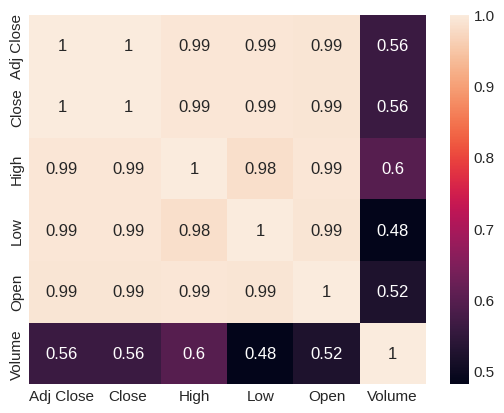

In [49]:
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

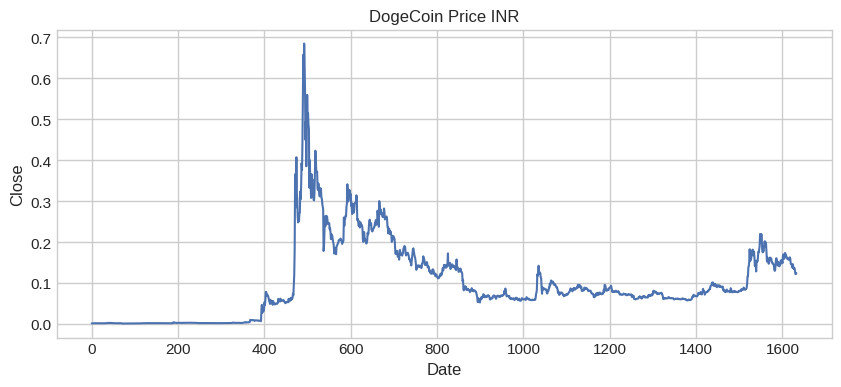

In [50]:
data.dropna()
plt.figure(figsize=(10, 4))
plt.title("DogeCoin Price INR")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

Now I will be using the autots library in Python to train a machine learning model for predicting the future prices of Dogecoin. If you have never used this library before then you can easily install it in your system by using the pip command:

In [51]:
pip install autots

Now I will be using the autots library in Python to train a machine learning model for predicting the future prices of Dogecoin. If you have never used this library before then you can easily install it in your system by using the pip command:

In [52]:
data.dtypes

,0
Date,datetime64[ns]
Adj Close,float64
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


In [53]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-01,0.002033,0.002033,0.002052,0.002021,0.002028,51180941
1,2020-01-02,0.002009,0.002009,0.002110,0.001983,0.002034,65071106
2,2020-01-03,0.002145,0.002145,0.002177,0.001991,0.002008,62619988
3,2020-01-04,0.002241,0.002241,0.002490,0.002050,0.002144,94227582
4,2020-01-05,0.002419,0.002419,0.002491,0.002117,0.002240,52631740


In [54]:
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [55]:
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-01,0.002033,0.002033,0.002052,0.002021,0.002028,51180941
1,2020-01-02,0.002009,0.002009,0.002110,0.001983,0.002034,65071106
2,2020-01-03,0.002145,0.002145,0.002177,0.001991,0.002008,62619988
3,2020-01-04,0.002241,0.002241,0.002490,0.002050,0.002144,94227582
4,2020-01-05,0.002419,0.002419,0.002491,0.002117,0.002240,52631740
...,...,...,...,...,...,...,...
1628,2024-06-16,0.136937,0.136937,0.137347,0.134819,0.136576,385407083
1629,2024-06-17,0.128889,0.128889,0.138023,0.126495,0.136940,960646592
1630,2024-06-18,0.122296,0.122296,0.129103,0.115392,0.128866,1413960450
1631,2024-06-19,0.122341,0.122341,0.126508,0.121579,0.122279,642487745


In [56]:
from autots import AutoTS
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()

Using 1 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 6 with model DatepartRegression in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.4744
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4628
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4617
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4586
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4535
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4450
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4464
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4351
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4277
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4104
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3901
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3750
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3444
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3062
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2830
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 25 with model FBProphet in generation 0 of 25
Model Number: 26 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 25
Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 of 25
Model Number: 36 with model SeasonalNaive in generation 0 of 25
Model Number: 37 with model DatepartRegression in generation 0 of 25
Model Number: 38 with model ARCH in g

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 41 with model Cassandra in generation 0 of 25
Template Eval Error: ValueError('transformed data is all zeroes') in model 41 in generation 0: Cassandra
Model Number: 42 with model Cassandra in generation 0 of 25
Model Number: 43 with model Cassandra in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 44 with model SectionalMotif in generation 0 of 25
Model Number: 45 with model FBProphet in generation 0 of 25
Model Number: 46 with model ARDL in generation 0 of 25
Model Number: 47 with model FFT in generation 0 of 25
Model Number: 48 with model BasicLinearModel in generation 0 of 25
Model Number: 49 with model BasicLinearModel in generation 0 of 25
Model Number: 50 with model SeasonalityMotif in generation 0 of 25
Model Number: 51 with model ETS in generation 0 of 25
Model Number: 52 with model FBProphet in generation 0 of 25


18:19:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 53 with model GLM in generation 0 of 25
Model Number: 54 with model UnivariateMotif in generation 0 of 25
Model Number: 55 with model ARDL in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 55 in generation 0: ARDL
Model Number: 56 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 56 in generation 0: ARCH
Model Number: 57 with model ConstantNaive in generation 0 of 25
Model Number: 58 with model LastValueNaive in generation 0 of 25
Model Number: 59 with model AverageValueNaive in generation 0 of 25
Model Number: 60 with model GLS in generation 0 of 25
Model Number: 61 with model SeasonalNaive in generation 0 of 25
Model Number: 62 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 62 in generation 0: VAR
Model Number: 63 with model WindowRegression in generation 0 of 2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 64 with model DatepartRegression in generation 0 of 25
Model Number: 65 with model SectionalMotif in generation 0 of 25
Model Number: 66 with model RRVAR in generation 0 of 25
Model Number: 67 with model MetricMotif in generation 0 of 25
Model Number: 68 with model Cassandra in generation 0 of 25
Template Eval Error: ValueError('Shape of passed values is (190, 2), indices imply (190, 1)') in model 68 in generation 0: Cassandra
Model Number: 69 with model SeasonalityMotif in generation 0 of 25
Model Number: 70 with model FFT in generation 0 of 25
Model Number: 71 with model BasicLinearModel in generation 0 of 25
Model Number: 72 with model SectionalMotif in generation 0 of 25
Model Number: 73 with model ARDL in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 73 in generation 0: ARDL
Model Number: 74 with model SeasonalityMotif in generation 0 of 25
Model Number: 75 with model MetricMotif in generation 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 97 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 97 in generation 0: VAR
Model Number: 98 with model ETS in generation 0 of 25
Model Number: 99 with model Cassandra in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 100 with model SeasonalityMotif in generation 0 of 25
Model Number: 101 with model SectionalMotif in generation 0 of 25
Model Number: 102 with model GLS in generation 0 of 25
Model Number: 103 with model GLS in generation 0 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params zero {\'0\': {\'method\': \'clip\', \'std_threshold\': 3, \'fillna\': None}, \'1\': {\'model\': \'GLS\', \'phi\': 1, \'window\': None, \'transform_dict\': None}, \'2\': {\'whiten\': True, \'n_components\': 10}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'mean\'}} with error ValueError("n_components=10 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 103 in generation 0: GLS
Model Number: 104 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 104

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.817e+01, tolerance: 1.897e-02
  model = cd_fast.enet_coordinate_descent(


Model Number: 112 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 112 in generation 0: ARCH
Model Number: 113 with model FFT in generation 0 of 25
Model Number: 114 with model FBProphet in generation 0 of 25
Model Number: 115 with model MetricMotif in generation 0 of 25
Model Number: 116 with model UnivariateMotif in generation 0 of 25
Model Number: 117 with model WindowRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 117 in generation 0: WindowRegression
Model Number: 118 with model UnivariateMotif in generation 0 of 25
Model Number: 119 with model ETS in generation 0 of 25
Model Number: 120 with model LastValueNaive in generation 0 of 25
Model Number: 121 with model Cassandra in generation 0 of 25
Model Number: 122 with model SectionalMotif in generation 0 of 25
Model Number: 123 with model DatepartRegression in generation 0 of

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Model Number: 138 with model GLS in generation 0 of 25
Model Number: 139 with model ARDL in generation 0 of 25
Model Number: 140 with model RRVAR in generation 0 of 25
Model Number: 141 with model SeasonalityMotif in generation 0 of 25
Model Number: 142 with model MetricMotif in generation 0 of 25
Model Number: 143 with model ETS in generation 0 of 25
Model Number: 144 with model ConstantNaive in generation 0 of 25
Model Number: 145 with model UnivariateMotif in generation 0 of 25
Model Number: 146 with model ETS in generation 0 of 25
Model Number: 147 with model FFT in generation 0 of 25
Model Number: 148 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 148 in generation 0: ARCH
Model Number: 149 with model GLM in generation 0 of 25
Model Number: 150 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 150 in generation 0: ARCH
Model Numbe

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 178 with model SectionalMotif in generation 1 of 25
Model Number: 179 with model LastValueNaive in generation 1 of 25
Model Number: 180 with model GLS in generation 1 of 25
Model Number: 181 with model LastValueNaive in generation 1 of 25
Model Number: 182 with model BasicLinearModel in generation 1 of 25
Model Number: 183 with model SeasonalityMotif in generation 1 of 25
Model Number: 184 with model SectionalMotif in generation 1 of 25
Model Number: 185 with model GLS in generation 1 of 25
Model Number: 186 with model SeasonalityMotif in generation 1 of 25
Model Number: 187 with model SeasonalNaive in generation 1 of 25
Model Number: 188 with model ConstantNaive in generation 1 of 25
Model Number: 189 with model BasicLinearModel in generation 1 of 25
Model Number: 190 with model MetricMotif in generation 1 of 25
Model Number: 191 with model UnivariateMotif in generation 1 of 25
Model Number: 192 with model LastValueNaive in generation 1 of 25
Model Number: 193 with model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Model Number: 205 with model MetricMotif in generation 1 of 25
Model Number: 206 with model LastValueNaive in generation 1 of 25
Model Number: 207 with model DatepartRegression in generation 1 of 25
Model Number: 208 with model MetricMotif in generation 1 of 25
Model Number: 209 with model LastValueNaive in generation 1 of 25
Model Number: 210 with model RRVAR in generation 1 of 25
Model Number: 211 with model UnivariateMotif in generation 1 of 25
Model Number: 212 with model SectionalMotif in generation 1 of 25
Model Number: 213 with model SeasonalityMotif in generation 1 of 25
Model Number: 214 with model SeasonalNaive in generation 1 of 25
Model Number: 215 with model MetricMotif in generation 1 of 25
Model Number: 216 with model FFT in generation 1 of 25
Model Number: 217 with model SeasonalityMotif in generation 1 of 25
Model Number: 218 with model FFT in generation 1 of 25
Model Number: 219 with model SeasonalNaive in generation 1 of 25
Model Number: 220 with model RRVAR in gener

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 239 with model SeasonalityMotif in generation 1 of 25
Model Number: 240 with model ConstantNaive in generation 1 of 25
Model Number: 241 with model SectionalMotif in generation 1 of 25
Model Number: 242 with model AverageValueNaive in generation 1 of 25
Model Number: 243 with model BasicLinearModel in generation 1 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 244 with model UnivariateMotif in generation 1 of 25
Model Number: 245 with model FBProphet in generation 1 of 25
Model Number: 246 with model GLS in generation 1 of 25
Model Number: 247 with model SeasonalityMotif in generation 1 of 25
Model Number: 248 with model RRVAR in generation 1 of 25
Model Number: 249 with model SectionalMotif in generation 1 of 25
Model Number: 250 with model SeasonalityMotif in generation 1 of 25
Template Eval Error: Exception('Transformer DatepartRegression failed on fit from params quadratic {\'0\': {\'rows\': 1, \'lag\': 7, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'mean\'}, \'1\': {}, \'2\': {\'regression_model\': {\'model\': \'MLP\', \'model_params\': {\'hidden_layer_sizes\': [2560], \'max_iter\': 250, \'activation\': \'tanh\', \'solver\': \'sgd\', \'early_stopping\': True, \'learning_rate_init\': 0.001, \'alpha\': None}}, \'datepart_method\': \'simple_binarized\', \'

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 253 with model GLM in generation 1 of 25
Model Number: 254 with model DatepartRegression in generation 1 of 25
Model Number: 255 with model SeasonalNaive in generation 1 of 25
Model Number: 256 with model FBProphet in generation 1 of 25
Model Number: 257 with model GLM in generation 1 of 25
Model Number: 258 with model AverageValueNaive in generation 1 of 25
Model Number: 259 with model DatepartRegression in generation 1 of 25
Model Number: 260 with model FBProphet in generation 1 of 25
New Generation: 2 of 25
Model Number: 261 with model MetricMotif in generation 2 of 25
Model Number: 262 with model GLM in generation 2 of 25
Model Number: 263 with model AverageValueNaive in generation 2 of 25
Model Number: 264 with model RRVAR in generation 2 of 25
Model Number: 265 with model GLS in generation 2 of 25
Model Number: 266 with model DatepartRegression in generation 2 of 25
Model Number: 267 with model GLM in generation 2 of 25
Model Number: 268 with model SeasonalityMotif 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 280 with model ETS in generation 2 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params ffill {'0': {'numtaps': 64, 'cutoff_hz': 10, 'window': 'blackman', 'sampling_frequency': 7, 'on_transform': True, 'on_inverse': False}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '2': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'transform_dict': None, 'reverse_alignment': False, 'isolated_only': True, 'fillna': 'rolling_mean_24'}, '3': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 4, 'deriv': 0, 'mode': 'mirror'}}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 280 in generation 2: ETS
Model Number: 281 with model BasicLinearModel in generation 2 of 25
Template Eval Error: Exception("Transformer BKBandpassFilter faile

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 305 with model FFT in generation 2 of 25
Model Number: 306 with model FFT in generation 2 of 25
Model Number: 307 with model MetricMotif in generation 2 of 25
Model Number: 308 with model ETS in generation 2 of 25
Model Number: 309 with model BasicLinearModel in generation 2 of 25
Model Number: 310 with model FBProphet in generation 2 of 25


18:19:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 311 with model AverageValueNaive in generation 2 of 25
Model Number: 312 with model SeasonalNaive in generation 2 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'det_order': 0, 'k_ar_diff': 2}, '1': {'output_distribution': 'uniform', 'n_quantiles': 63}, '2': {'lag': 1, 'fill': 'zero'}} with error ValueError('Coint only works on multivarate series')") in model 312 in generation 2: SeasonalNaive
Model Number: 313 with model MetricMotif in generation 2 of 25
Model Number: 314 with model FFT in generation 2 of 25
Model Number: 315 with model SeasonalityMotif in generation 2 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 316 with model SeasonalNaive in generation 2 of 25
Model Number: 317 with model SeasonalityMotif in generation 2 of 25
Model Number: 318 with model SeasonalNaive in generation 2 of 25
Model Number: 319 with model ConstantNaive in generation 2 of 25
Model Number: 320 with model ConstantNaive in generation 2 of 25
Model Number: 321 with model SeasonalNaive in generation 2 of 25
Model Number: 322 with model GLS in generation 2 of 25
Model Number: 323 with model GLS in generation 2 of 25
Model Number: 324 with model LastValueNaive in generation 2 of 25
Model Number: 325 with model SectionalMotif in generation 2 of 25
Model Number: 326 with model UnivariateMotif in generation 2 of 25
Model Number: 327 with model FBProphet in generation 2 of 25
Model Number: 328 with model SeasonalNaive in generation 2 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params rolling_mean_24 {'0': {}, '1': {'model': 'Poisson', 'phi': 1, 'window': 10, 'transform_dict': 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Model Number: 336 with model LastValueNaive in generation 2 of 25
Model Number: 337 with model GLM in generation 2 of 25
Model Number: 338 with model Cassandra in generation 2 of 25
Template Eval Error: ValueError('Shape of passed values is (190, 2), indices imply (190, 1)') in model 338 in generation 2: Cassandra
Model Number: 339 with model GLS in generation 2 of 25
Template Eval Error: Exception("Transformer BKBandpassFilter failed on inverse from params linear {'0': {'lag_1': 24, 'method': 20}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'mean'}, '3': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': [52, 'quarter']}, 'fillna': 'linear'}, '4': {'low': 6, 'high': 40, 'K': 25, 'lanczos_factor': False, 'return_diff': True, 'on_transform': False, 'on_inverse': True}} with ValueError('Sh

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 343 with model ARDL in generation 2 of 25
Model Number: 344 with model SectionalMotif in generation 2 of 25
Model Number: 345 with model AverageValueNaive in generation 2 of 25
Model Number: 346 with model ConstantNaive in generation 2 of 25
Model Number: 347 with model UnivariateMotif in generation 2 of 25
Model Number: 348 with model MetricMotif in generation 2 of 25
Model Number: 349 with model SectionalMotif in generation 2 of 25
Model Number: 350 with model AverageValueNaive in generation 2 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 351 with model AverageValueNaive in generation 2 of 25
Model Number: 352 with model BasicLinearModel in generation 2 of 25
Model Number: 353 with model DatepartRegression in generation 2 of 25
Template Eval Error: IndexError('tuple index out of range') in model 353 in generation 2: DatepartRegression
Model Number: 354 with model RRVAR in generation 2 of 25
Model Number: 355 with model SeasonalNaive in generation 2 of 25
Model Number: 356 with model LastValueNaive in generation 2 of 25
Model Number: 357 with model GLS in generation 2 of 25
Model Number: 358 with model FFT in generation 2 of 25
Model Number: 359 with model ARDL in generation 2 of 25
Template Eval Error: ValueError("ARDL series Close_theta0 failed with error ValueError('The number of regressors (120) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (54).') exog train             weekend  quarter      epoch  month_1  mo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 380 with model GLM in generation 3 of 25
Model Number: 381 with model SectionalMotif in generation 3 of 25
Model Number: 382 with model UnivariateMotif in generation 3 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '3': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, '4': {'rows': 1, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '5': {'window_size': 90, 'alpha': 3.5, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'average'}} with error ValueError('BTCD only works on multivarate series')") in model 382 in generation 3: UnivariateMotif
Model Number: 383

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 387 with model UnivariateMotif in generation 3 of 25
Model Number: 388 with model BasicLinearModel in generation 3 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params zero {'0': {'decimals': 1, 'on_transform': True, 'on_inverse': True}, '1': {'model_name': 'MA', 'state_transition': [[1, 0], [1, 0]], 'process_noise': [[0.2, 0.0], [0.0, 0]], 'observation_model': [[1, 0.1]], 'observation_noise': 1.0, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '2': {'low': 6, 'high': 28, 'K': 1, 'lanczos_factor': False, 'return_diff': True, 'on_transform': False, 'on_inverse': True}, '3': {'sigma': 3, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.9, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 2000}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags'

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 398 with model SeasonalityMotif in generation 3 of 25
Model Number: 399 with model MetricMotif in generation 3 of 25
Model Number: 400 with model MetricMotif in generation 3 of 25
Model Number: 401 with model GLM in generation 3 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill_mean_biased {\'0\': {}, \'1\': {}, \'2\': {\'discretization\': \'sklearn-uniform\', \'n_bins\': 10}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.9, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'max\'}, \'4\': {\'whiten\': False, \'n_components\': 24}} with error ValueError("n_components=24 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 401 in generation 3: GLM
Model Number: 402 with model GLM in generation 3 of 25
Model Number: 403 with model AverageValueNaive in generation 3 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from p

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 417 with model MetricMotif in generation 3 of 25
Model Number: 418 with model SectionalMotif in generation 3 of 25
Model Number: 419 with model AverageValueNaive in generation 3 of 25
Model Number: 420 with model LastValueNaive in generation 3 of 25
Model Number: 421 with model SeasonalNaive in generation 3 of 25
Model Number: 422 with model RRVAR in generation 3 of 25
Model Number: 423 with model RRVAR in generation 3 of 25
Template Eval Error: Exception("Transformer BKBandpassFilter failed on inverse from params ffill_mean_biased {'0': {'low': 6, 'high': 28, 'K': 25, 'lanczos_factor': False, 'return_diff': True, 'on_transform': False, 'on_inverse': True}, '1': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': True, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'meth

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 425 with model BasicLinearModel in generation 3 of 25
Model Number: 426 with model SeasonalityMotif in generation 3 of 25
Model Number: 427 with model ConstantNaive in generation 3 of 25
Model Number: 428 with model DatepartRegression in generation 3 of 25
Model Number: 429 with model DatepartRegression in generation 3 of 25
Model Number: 430 with model MetricMotif in generation 3 of 25
Model Number: 431 with model UnivariateMotif in generation 3 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 432 with model BasicLinearModel in generation 3 of 25
Model Number: 433 with model MetricMotif in generation 3 of 25
Model Number: 434 with model ETS in generation 3 of 25
Model Number: 435 with model ConstantNaive in generation 3 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'window_size': 30, 'alpha': 3.5, 'grouping_forward_limit': 6, 'max_level_shifts': 5, 'alignment': 'rolling_diff'}, '1': {}, '2': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'mean', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': False, 'on_inverse': False}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Model Number: 493 with model GLM in generation 4 of 25
Model Number: 494 with model LastValueNaive in generation 4 of 25
Model Number: 495 with model SeasonalityMotif in generation 4 of 25
Model Number: 496 with model ARDL in generation 4 of 25
Model Number: 497 with model AverageValueNaive in generation 4 of 25
Model Number: 498 with model SeasonalityMotif in generation 4 of 25
Model Number: 499 with model LastValueNaive in generation 4 of 25
Model Number: 500 with model RRVAR in generation 4 of 25
Model Number: 501 with model AverageValueNaive in generation 4 of 25
Model Number: 502 with model ARDL in generation 4 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': -1, 'k_ar_diff': 2}, '1': {'model': 'Linear', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}}} with error ValueError('Coint only works

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 508 with model GLM in generation 4 of 25
Model Number: 509 with model BasicLinearModel in generation 4 of 25
Model Number: 510 with model GLM in generation 4 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 510 in generation 4: GLM
Model Number: 511 with model AverageValueNaive in generation 4 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/

Model Number: 512 with model ETS in generation 4 of 25
Model Number: 513 with model UnivariateMotif in generation 4 of 25
Model Number: 514 with model FBProphet in generation 4 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params akima {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {'cutoff': 0.2, 'reverse': True, 'on_transform': False, 'on_inverse': False}, '2': {'rows': 1, 'lag': 28, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}} with error ValueError('Coint only works on multivarate series')") in model 514 in generation 4: FBProphet
Model Number: 515 with model SeasonalityMotif in generation 4 of 25
Model Number: 516 with model FFT in generation 4 of 25
Model Number: 517 with model SeasonalityMotif in generation 4 of 25
Model Number: 518 with model SeasonalNaive in generation 4 of 25
Model Number: 519 with model DatepartRegression in generation 4 of 25
Model Number: 520 with mo

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 535 with model ETS in generation 4 of 25
Model Number: 536 with model GLM in generation 4 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 536 in generation 4: GLM
Model Number: 537 with model ARDL in generation 4 of 25
Model Number: 538 with model BasicLinearModel in generation 4 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 539 with model RRVAR in generation 4 of 25
Model Number: 540 with model BasicLinearModel in generation 4 of 25
Model Number: 541 with model LastValueNaive in generation 4 of 25
Model Number: 542 with model SeasonalityMotif in generation 4 of 25
Model Number: 543 with model FBProphet in generation 4 of 25
Model Number: 544 with model SeasonalityMotif in generation 4 of 25
Model Number: 545 with model GLM in generation 4 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 545 in generation 4: GLM
Model Number: 546 with model UnivariateMotif in generation 4 of 25
Model Number: 547 with model LastValueNaive in generation 4 of 25
Model Number: 548 with model MetricMotif in generation 4 of 25
Model Number: 549 with model SeasonalNaive in generation 4 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 550 with model AverageValueNaive in generation 4 of 25
Model Number: 551 with model SeasonalNaive in generation 4 of 25
Model Number: 552 with model WindowRegression in generation 4 of 25
Model Number: 553 with model WindowRegression in generation 4 of 25
Template Eval Error: LightGBMError('Unknown objective type name: regression,mape') in model 553 in generation 4: WindowRegression
Model Number: 554 with model FBProphet in generation 4 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Model Number: 555 with model FFT in generation 4 of 25
Model Number: 556 with model FBProphet in generation 4 of 25
Model Number: 557 with model ARDL in generation 4 of 25
Model Number: 558 with model AverageValueNaive in generation 4 of 25
Model Number: 559 with model LastValueNaive in generation 4 of 25
Model Number: 560 with model MetricMotif in generation 4 of 25
Model Number: 561 with model FFT in generation 4 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 0, 'k_ar_diff': 0}, '1': {}, '2': {}, '3': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.08}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': False, 'on_inverse': False}} with error ValueError('Coint only 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 581 with model SectionalMotif in generation 5 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params rolling_mean_24 {'0': {'method': 'zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False, 'on_inverse': False}, '1': {}, '2': {'lag_1': 1440, 'method': 5}, '3': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 4, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'friedman_mse', 'max_features': 0.3}}, 'datepart_method': ['weekdayofmonth', 'common_fourier'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'trans

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 593 with model GLM in generation 5 of 25
Model Number: 594 with model LastValueNaive in generation 5 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 595 with model ARDL in generation 5 of 25
Model Number: 596 with model MetricMotif in generation 5 of 25
Model Number: 597 with model AverageValueNaive in generation 5 of 25
Model Number: 598 with model MetricMotif in generation 5 of 25
Model Number: 599 with model MetricMotif in generation 5 of 25
Model Number: 600 with model GLM in generation 5 of 25
Model Number: 601 with model FBProphet in generation 5 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 602 with model GLM in generation 5 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 602 in generation 5: GLM
Model Number: 603 with model SectionalMotif in generation 5 of 25
Model Number: 604 with model MetricMotif in generation 5 of 25
Model Number: 605 with model RRVAR in generation 5 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 606 with model UnivariateMotif in generation 5 of 25
Model Number: 607 with model FBProphet in generation 5 of 25
Model Number: 608 with model ETS in generation 5 of 25
Model Number: 609 with model SeasonalNaive in generation 5 of 25
Model Number: 610 with model FBProphet in generation 5 of 25
Model Number: 611 with model LastValueNaive in generation 5 of 25
Template Eval Error: Exception("Transformer SinTrend failed on inverse from params rolling_mean_24 {'0': {}, '1': {}, '2': {'fillna': 'one', 'center': 'median'}, '3': {'window': None}, '4': {}} with ValueError('Shape of passed values is (10, 2), indices imply (10, 1)')") in model 611 in generation 5: LastValueNaive
Model Number: 612 with model LastValueNaive in generation 5 of 25
Model Number: 613 with model DatepartRegression in generation 5 of 25
Model Number: 614 with model AverageValueNaive in generation 5 of 25
Model Number: 615 with model SeasonalityMotif in generation 5 of 25
Model Number: 616 with model Consta

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 626 with model GLM in generation 5 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params median {\'0\': {}, \'1\': {\'numtaps\': 1024, \'cutoff_hz\': 0.01, \'window\': \'hann\', \'sampling_frequency\': 28, \'on_transform\': True, \'on_inverse\': False}, \'2\': {\'whiten\': False, \'n_components\': 100}} with error ValueError("n_components=100 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 626 in generation 5: GLM
Model Number: 627 with model SeasonalityMotif in generation 5 of 25
Model Number: 628 with model ARDL in generation 5 of 25
Model Number: 629 with model MetricMotif in generation 5 of 25
Model Number: 630 with model RRVAR in generation 5 of 25
Model Number: 631 with model BasicLinearModel in generation 5 of 25
Model Number: 632 with model FFT in generation 5 of 25
Model Number: 633 with model ARDL in generation 5 of 25
Model Number: 634 with model MetricMotif in generation 5 of 25
Mode

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 652 with model BasicLinearModel in generation 5 of 25
Model Number: 653 with model LastValueNaive in generation 5 of 25
Model Number: 654 with model AverageValueNaive in generation 5 of 25
Model Number: 655 with model RRVAR in generation 5 of 25
Model Number: 656 with model SeasonalNaive in generation 5 of 25
Model Number: 657 with model GLM in generation 5 of 25
Model Number: 658 with model UnivariateMotif in generation 5 of 25
Model Number: 659 with model UnivariateMotif in generation 5 of 25
New Generation: 6 of 25
Model Number: 660 with model FFT in generation 6 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '2': {'method': 'minmax', 'method_params': {'alpha': 0.03}, 'fillna': 'ffill', 'transform_dict': None,

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / s

Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'decimals': 2, 'on_transform': True, 'on_inverse': False}, '1': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': True, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': True, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 300, 'center': True}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, 'remove_excess_anomalies': True, 'impact': 'anomaly_score', 'regression_params': {}}, '2': {}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 6, 'eta': 1.0, 'min_child_weight': 10, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 693 with model LastValueNaive in generation 6 of 25
Model Number: 694 with model MetricMotif in generation 6 of 25
Model Number: 695 with model SeasonalityMotif in generation 6 of 25
Model Number: 696 with model AverageValueNaive in generation 6 of 25
Model Number: 697 with model SeasonalityMotif in generation 6 of 25
Model Number: 698 with model ETS in generation 6 of 25
Model Number: 699 with model AverageValueNaive in generation 6 of 25
Model Number: 700 with model SectionalMotif in generation 6 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 700 in generation 6: SectionalMotif
Model Number: 701 with model ConstantNaive in generation 6 of 25
Model Number: 702 with model ARDL in generation 6 of 25
Model Number: 703 with model DatepartRegression in generation 6 of 25
Model Number: 704 with model MetricMotif in generation 6 of 25
Model Number: 705 with model DatepartRegression in generation 6 of 25
Model Number: 7

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 709 with model MetricMotif in generation 6 of 25
Model Number: 710 with model GLM in generation 6 of 25
Model Number: 711 with model SeasonalNaive in generation 6 of 25
Model Number: 712 with model LastValueNaive in generation 6 of 25
Model Number: 713 with model SectionalMotif in generation 6 of 25
Model Number: 714 with model SeasonalityMotif in generation 6 of 25
Model Number: 715 with model UnivariateMotif in generation 6 of 25
Model Number: 716 with model SeasonalNaive in generation 6 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'rows': 24, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '2': {'method': 'minmax', 'method_params': {'alpha': 0.03}, 'fillna': 'ffill', 'transform_dict': None, 'is

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 726 with model RRVAR in generation 6 of 25
Model Number: 727 with model GLM in generation 6 of 25
Model Number: 728 with model ARDL in generation 6 of 25
Model Number: 729 with model RRVAR in generation 6 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 730 with model ARDL in generation 6 of 25
Model Number: 731 with model MetricMotif in generation 6 of 25
Model Number: 732 with model Cassandra in generation 6 of 25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 733 with model AverageValueNaive in generation 6 of 25
Template Eval Error: ValueError('Model AverageValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 733 in generation 6: AverageValueNaive
Model Number: 734 with model FBProphet in generation 6 of 25
Model Number: 735 with model GLM in generation 6 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 736 with model UnivariateMotif in generation 6 of 25
Model Number: 737 with model SeasonalNaive in generation 6 of 25
Model Number: 738 with model ARDL in generation 6 of 25
Model Number: 739 with model SectionalMotif in generation 6 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 740 with model BasicLinearModel in generation 6 of 25
Model Number: 741 with model LastValueNaive in generation 6 of 25
Model Number: 742 with model ConstantNaive in generation 6 of 25
Model Number: 743 with model ARDL in generation 6 of 25
New Generation: 7 of 25
Model Number: 744 with model LastValueNaive in generation 7 of 25
Model Number: 745 with model ARDL in generation 7 of 25
Model Number: 746 with model ARDL in generation 7 of 25
Model Number: 747 with model DatepartRegression in generation 7 of 25
Model Number: 748 with model MetricMotif in generation 7 of 25
Model Number: 749 with model SectionalMotif in generation 7 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'det_order': -1, 'k_ar_diff': 1}, '1': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': False, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 767 with model UnivariateMotif in generation 7 of 25
Model Number: 768 with model UnivariateMotif in generation 7 of 25
Model Number: 769 with model RRVAR in generation 7 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params ffill {'0': {'algorithm': 'deflation', 'fun': 'cube', 'max_iter': 250, 'whiten': 'unit-variance'}, '1': {'numtaps': 256, 'cutoff_hz': 20, 'window': 'blackman', 'sampling_frequency': 24, 'on_transform': True, 'on_inverse': False}, '2': {'rolling_window': 0.05, 'n_tails': 0.05, 'n_future': 0.05, 'method': 'mean', 'macro_micro': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 769 in generation 7: RRVAR
Model Number: 770 with model AverageValueNaive in generation 7 of 25
Model Number: 771 with model FFT in gener

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 780 with model FBProphet in generation 7 of 25
Model Number: 781 with model SeasonalNaive in generation 7 of 25
Model Number: 782 with model AverageValueNaive in generation 7 of 25
Model Number: 783 with model DatepartRegression in generation 7 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 783 in generation 7: DatepartRegression
Model Number: 784 with model SeasonalNaive in generation 7 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {'rolling_window': 0.05, 'n_tails': 0.05, 'n_future': 0.05, 'method': 'mean', 'macro_micro': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '4': {'span': 7}} with error ValueError('BTCD only works on multivarate series')") in model 784 in gene

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 794 with model ARDL in generation 7 of 25
Model Number: 795 with model BasicLinearModel in generation 7 of 25
Model Number: 796 with model MetricMotif in generation 7 of 25
Model Number: 797 with model AverageValueNaive in generation 7 of 25
Model Number: 798 with model DatepartRegression in generation 7 of 25
Model Number: 799 with model ARDL in generation 7 of 25
Model Number: 800 with model GLM in generation 7 of 25
Model Number: 801 with model ARDL in generation 7 of 25
Model Number: 802 with model ARDL in generation 7 of 25
Model Number: 803 with model BasicLinearModel in generation 7 of 25
Model Number: 804 with model Cassandra in generation 7 of 25
Model Number: 805 with model BasicLinearModel in generation 7 of 25
Model Number: 806 with model RRVAR in generation 7 of 25
Model Number: 807 with model AverageValueNaive in generation 7 of 25


/usr/local/lib/python3.10/dist-packages/autots/models/basics.py:3595: RuntimeWarning: invalid value encountered in sqrt
  self.sigma = np.sqrt(sse / (n - p))


Model Number: 808 with model ARDL in generation 7 of 25
Model Number: 809 with model LastValueNaive in generation 7 of 25
Model Number: 810 with model DatepartRegression in generation 7 of 25
interpolating
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 810 in generation 7: DatepartRegression
Model Number: 811 with model SectionalMotif in generation 7 of 25
Model Number: 812 with model MetricMotif in generation 7 of 25
Model Number: 813 with model ARDL in generation 7 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 814 with model SeasonalityMotif in generation 7 of 25
Model Number: 815 with model BasicLinearModel in generation 7 of 25
Model Number: 816 with model AverageValueNaive in generation 7 of 25
Model Number: 817 with model BasicLinearModel in generation 7 of 25
Model Number: 818 with model MetricMotif in generation 7 of 25
Model Number: 819 with model SeasonalityMotif in generation 7 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 820 with model BasicLinearModel in generation 7 of 25
Model Number: 821 with model GLM in generation 7 of 25
Model Number: 822 with model SeasonalityMotif in generation 7 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '2': {'det_order': 0, 'k_ar_diff': 0}, '3': {}} with error ValueError('Coint only works on multivarate series')") in model 822 in generation 7: SeasonalityMotif
Model Number: 823 with model RRVAR in generation 7 of 25
Model Number: 824 with model AverageValueNaive in generation 7 of 25
Model Number: 825 with model FBProphet in generation 7 of 25
No anomalies detected.
Model Number: 826 with model MetricMotif in generation 7 of 25
Mo

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 838 with model LastValueNaive in generation 8 of 25
Model Number: 839 with model SectionalMotif in generation 8 of 25
Model Number: 840 with model RRVAR in generation 8 of 25
Model Number: 841 with model ARDL in generation 8 of 25
Model Number: 842 with model DatepartRegression in generation 8 of 25
Model Number: 843 with model ETS in generation 8 of 25
Model Number: 844 with model LastValueNaive in generation 8 of 25
Model Number: 845 with model SeasonalNaive in generation 8 of 25
Model Number: 846 with model UnivariateMotif in generation 8 of 25
Model Number: 847 with model UnivariateMotif in generation 8 of 25
Model Number: 848 with model UnivariateMotif in generation 8 of 25
Model Number: 849 with model FFT in generation 8 of 25
Model Number: 850 with model AverageValueNaive in generation 8 of 25
Model Number: 851 with model UnivariateMotif in generation 8 of 25
Model Number: 852 with model SeasonalityMotif in generation 8 of 25
Template Eval Error: Exception("Transfo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 874 with model SeasonalityMotif in generation 8 of 25
Model Number: 875 with model DatepartRegression in generation 8 of 25
Model Number: 876 with model AverageValueNaive in generation 8 of 25
Model Number: 877 with model DatepartRegression in generation 8 of 25
Model Number: 878 with model AverageValueNaive in generation 8 of 25
Model Number: 879 with model RRVAR in generation 8 of 25
Model Number: 880 with model MetricMotif in generation 8 of 25
Template Eval Error: ValueError('Shape of passed values is (10, 2), indices imply (10, 1)') in model 880 in generation 8: MetricMotif
Model Number: 881 with model MetricMotif in generation 8 of 25
Model Number: 882 with model UnivariateMotif in generation 8 of 25
Model Number: 883 with model UnivariateMotif in generation 8 of 25
Model Number: 884 with model MetricMotif in generation 8 of 25
Model Number: 885 with model ARDL in generation 8 of 25
Model Number: 886 with model ETS in generation 8 of 25
Model Number: 887 with model 

18:21:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 933 with model AverageValueNaive in generation 9 of 25
Model Number: 934 with model MetricMotif in generation 9 of 25
Model Number: 935 with model UnivariateMotif in generation 9 of 25
Model Number: 936 with model SeasonalNaive in generation 9 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 937 with model FBProphet in generation 9 of 25
Model Number: 938 with model RRVAR in generation 9 of 25
Model Number: 939 with model ETS in generation 9 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params mean {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.003, 'min_child_weight': 0.5, 'subsample': 1, 'colsample_bylevel': 0.9, 'reg_alpha': 0, 'reg_lambda': 1, 'multi_strategy': 'multi_output_tree', 'tree_method': 'hist'}, 'datepart_method': 'common_fourier'}, 'fillna': 'pchip'}, '2': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.1, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 5000}}, 'datepart_method': ['dayofweek', [365.25, 14], [354.37, 10]], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}} with error ValueError('Invalid classes

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 953 with model SeasonalityMotif in generation 9 of 25
Model Number: 954 with model RRVAR in generation 9 of 25
Model Number: 955 with model ARDL in generation 9 of 25
Model Number: 956 with model SectionalMotif in generation 9 of 25
Model Number: 957 with model GLM in generation 9 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 957 in generation 9: GLM
Model Number: 958 with model ETS in generation 9 of 25
Model Number: 959 with model ARDL in generation 9 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / s

Model Number: 960 with model AverageValueNaive in generation 9 of 25
Model Number: 961 with model MetricMotif in generation 9 of 25
Model Number: 962 with model FFT in generation 9 of 25
Model Number: 963 with model SectionalMotif in generation 9 of 25
Model Number: 964 with model SectionalMotif in generation 9 of 25
Model Number: 965 with model ARDL in generation 9 of 25
Model Number: 966 with model LastValueNaive in generation 9 of 25
Model Number: 967 with model RRVAR in generation 9 of 25
Model Number: 968 with model RRVAR in generation 9 of 25
Model Number: 969 with model AverageValueNaive in generation 9 of 25
Model Number: 970 with model FBProphet in generation 9 of 25
Model Number: 971 with model ConstantNaive in generation 9 of 25
Model Number: 972 with model ConstantNaive in generation 9 of 25
Model Number: 973 with model BasicLinearModel in generation 9 of 25
Model Number: 974 with model GLM in generation 9 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 975 with model RRVAR in generation 9 of 25
Model Number: 976 with model GLM in generation 9 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 976 in generation 9: GLM
Model Number: 977 with model BasicLinearModel in generation 9 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 978 with model SeasonalityMotif in generation 9 of 25
Model Number: 979 with model SectionalMotif in generation 9 of 25
Model Number: 980 with model ARDL in generation 9 of 25
Model Number: 981 with model ConstantNaive in generation 9 of 25
Model Number: 982 with model MetricMotif in generation 9 of 25
Model Number: 983 with model FBProphet in generation 9 of 25
Model Number: 984 with model ConstantNaive in generation 9 of 25
Model Number: 985 with model MetricMotif in generation 9 of 25
Model Number: 986 with model AverageValueNaive in generation 9 of 25
Model Number: 987 with model RRVAR in generation 9 of 25
Model Number: 988 with model DatepartRegression in generation 9 of 25
Model Number: 989 with model MetricMotif in generation 9 of 25
Model Number: 990 with model RRVAR in generation 9 of 25
Model Number: 991 with model FBProphet in generation 9 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'algorith

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1019 with model LastValueNaive in generation 10 of 25
Model Number: 1020 with model SeasonalityMotif in generation 10 of 25
Model Number: 1021 with model DatepartRegression in generation 10 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1021 in generation 10: DatepartRegression
Model Number: 1022 with model DatepartRegression in generation 10 of 25
Model Number: 1023 with model MetricMotif in generation 10 of 25
Model Number: 1024 with model SeasonalityMotif in generation 10 of 25
Model Number: 1025 with model GLM in generation 10 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill_mean_biased {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'simple_binarized'}, 'fillna': 'mean'}, '2': {'rolling_window': 0.05, 'n_tails': 0.05, 'n_future': 0.05, 'method': 'mean', 'macro_micro': False}, '3': {'rows': 1, 'lag': 7

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 1028 with model FBProphet in generation 10 of 25
Model Number: 1029 with model DatepartRegression in generation 10 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1029 in generation 10: DatepartRegression
Model Number: 1030 with model DatepartRegression in generation 10 of 25
interpolating
Template Eval Error: ValueError('`x` must contain at least 2 elements.') in model 1030 in generation 10: DatepartRegression
Model Number: 1031 with model ARDL in generation 10 of 25
Model Number: 1032 with model FBProphet in generation 10 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1033 with model FBProphet in generation 10 of 25
Model Number: 1034 with model SeasonalityMotif in generation 10 of 25
Model Number: 1035 with model MetricMotif in generation 10 of 25
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 1035 in generation 10: MetricMotif
Model Number: 1036 with model DatepartRegression in generation 10 of 25
Model Number: 1037 with model UnivariateMotif in generation 10 of 25
Model Number: 1038 with model ARDL in generation 10 of 25
Model Number: 1039 with model RRVAR in generation 10 of 25
Model Number: 1040 with model ARDL in generation 10 of 25
Model Number: 1041 with model FBProphet in generation 10 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'span': 7}, '2': {'det_order': -1, 'k_ar_diff': 2}, '3': {'span':

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1046 with model GLM in generation 10 of 25
Model Number: 1047 with model FBProphet in generation 10 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1048 with model LastValueNaive in generation 10 of 25
Model Number: 1049 with model RRVAR in generation 10 of 25
Model Number: 1050 with model LastValueNaive in generation 10 of 25
Model Number: 1051 with model SectionalMotif in generation 10 of 25
Model Number: 1052 with model RRVAR in generation 10 of 25
Model Number: 1053 with model MetricMotif in generation 10 of 25
Model Number: 1054 with model SectionalMotif in generation 10 of 25
Model Number: 1055 with model AverageValueNaive in generation 10 of 25
Model Number: 1056 with model BasicLinearModel in generation 10 of 25
Model Number: 1057 with model SeasonalityMotif in generation 10 of 25
Model Number: 1058 with model ARDL in generation 10 of 25
New Generation: 11 of 25
Model Number: 1059 with model ETS in generation 11 of 25
Model Number: 1060 with model BasicLinearModel in generation 11 of 25
Model Number: 1061 with model ARDL in generation 11 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1069 with model SectionalMotif in generation 11 of 25
Model Number: 1070 with model RRVAR in generation 11 of 25
Model Number: 1071 with model ETS in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1072 with model FBProphet in generation 11 of 25
Model Number: 1073 with model ETS in generation 11 of 25
Model Number: 1074 with model SeasonalNaive in generation 11 of 25
Model Number: 1075 with model GLM in generation 11 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1075 in generation 11: GLM
Model Number: 1076 with model BasicLinearModel in generation 11 of 25
Model Number: 1077 with model RRVAR in generation 11 of 25
Model Number: 1078 with model SeasonalityMotif in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / s

Model Number: 1079 with model GLM in generation 11 of 25
Model Number: 1080 with model ARDL in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1081 with model ETS in generation 11 of 25
Model Number: 1082 with model AverageValueNaive in generation 11 of 25
Model Number: 1083 with model ARDL in generation 11 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1083 in generation 11: ARDL
Model Number: 1084 with model DatepartRegression in generation 11 of 25
Model Number: 1085 with model DatepartRegression in generation 11 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'DatepartRegression', '2': 'LocalLinearTrend'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': None, 'holiday_cou

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1089 with model SeasonalityMotif in generation 11 of 25
Model Number: 1090 with model ETS in generation 11 of 25
Model Number: 1091 with model SeasonalityMotif in generation 11 of 25
Model Number: 1092 with model UnivariateMotif in generation 11 of 25
Model Number: 1093 with model AverageValueNaive in generation 11 of 25
Model Number: 1094 with model SectionalMotif in generation 11 of 25
Model Number: 1095 with model FBProphet in generation 11 of 25
Model Number: 1096 with model LastValueNaive in generation 11 of 25
Model Number: 1097 with model DatepartRegression in generation 11 of 25
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 999.6212 
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.7291  
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 87.4380  
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 96.5081  
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3440   
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.7539
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.3522 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2004 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0655 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0165 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7203 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1660  
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4507 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6012 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4511  
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Model Number: 1098 with model MetricMotif in generation 11 of 25
Model Number: 1099 with model LastValueNaive in generation 11 of 25
Model Number: 1100 with model AverageValueNaive in generation 11 of 25
Model Number: 1101 with model UnivariateMotif in generation 11 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {}, '2': {'rolling_window': 0.05, 'n_tails': 0.05, 'n_future': 0.05, 'method': 'mean', 'macro_micro': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '4': {}, '5': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate series')") in model 1101 in generation 11:

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Model Number: 1135 with model ARDL in generation 12 of 25
Model Number: 1136 with model SeasonalityMotif in generation 12 of 25
Model Number: 1137 with model ETS in generation 12 of 25
Model Number: 1138 with model RRVAR in generation 12 of 25
Model Number: 1139 with model FBProphet in generation 12 of 25
Model Number: 1140 with model AverageValueNaive in generation 12 of 25
Model Number: 1141 with model UnivariateMotif in generation 12 of 25
Model Number: 1142 with model MetricMotif in generation 12 of 25
Model Number: 1143 with model FBProphet in generation 12 of 25
Model Number: 1144 with model SeasonalityMotif in generation 12 of 25
Model Number: 1145 with model SectionalMotif in generation 12 of 25
Model Number: 1146 with model SeasonalityMotif in generation 12 of 25
Model Number: 1147 with model AverageValueNaive in generation 12 of 25
Model Number: 1148 with model DatepartRegression in generation 12 of 25
Model Number: 1149 with model FBProphet in generation 12 of 25
Model Numbe

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1152 with model UnivariateMotif in generation 12 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {'method': 100}, '1': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'mean', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, 'remove_excess_anomalies': True, 'impact': None, 'regression_params': {}}, '2': {'constant': 0, 'reintroduction_model': None, 'fillna': 'mean'}, '3': {'method': 'clip', 'std_threshold': 5, 'fillna': None}} with error ValueError('more than 1 year of data is required for holiday detection.')") in model 1152 in g

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


Model Number: 1163 with model SeasonalityMotif in generation 12 of 25
Model Number: 1164 with model ConstantNaive in generation 12 of 25
Model Number: 1165 with model DatepartRegression in generation 12 of 25
Model Number: 1166 with model AverageValueNaive in generation 12 of 25
Model Number: 1167 with model BasicLinearModel in generation 12 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1167 in generation 12: BasicLinearModel
Model Number: 1168 with model MetricMotif in generation 12 of 25
Model Number: 1169 with model SectionalMotif in generation 12 of 25
Model Number: 1170 with model SectionalMotif in generation 12 of 25
Model Number: 1171 with model RRVAR in generation 12 of 25
Model Number: 1172 with model ETS in generation 12 of 25
Model Number: 1173 with model ConstantNaive in generation 12 of 25
Model Number: 1174 with model AverageValueNaive in generation 12 of 25
Model Number: 1175 with model SeasonalNaive in generat

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1233 with model AverageValueNaive in generation 13 of 25
Model Number: 1234 with model MetricMotif in generation 13 of 25
Model Number: 1235 with model DatepartRegression in generation 13 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1235 in generation 13: DatepartRegression
Model Number: 1236 with model FBProphet in generation 13 of 25
Model Number: 1237 with model ETS in generation 13 of 25
Model Number: 1238 with model DatepartRegression in generation 13 of 25
Template Eval Error: InvalidParameterError("The 'alpha' parameter of MLPRegressor must be a float in the range [0.0, inf). Got None instead.") in model 1238 in generation 13: DatepartRegression
Model Number: 1239 with model AverageValueNaive in generation 13 of 25
Model Number: 1240 with model SeasonalityMotif in generation 13 of 25
Model Number: 1241 with model SectionalMotif in generation 13 of 25
Model Number: 1242 with model RRVAR in generation 13 of 2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1252 with model DatepartRegression in generation 14 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1252 in generation 14: DatepartRegression
Model Number: 1253 with model AverageValueNaive in generation 14 of 25
Model Number: 1254 with model RRVAR in generation 14 of 25
Model Number: 1255 with model MetricMotif in generation 14 of 25
Model Number: 1256 with model MetricMotif in generation 14 of 25
Model Number: 1257 with model RRVAR in generation 14 of 25
Model Number: 1258 with model ETS in generation 14 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'lag_1': 364, 'method': 20}, '2': {'model': 'Tweedie', 'phi': 0.99, 'window': None, 'transform_dict': {'fillna': 'time', 'transformations': {'0': 'HistoricV

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 1277 with model ARDL in generation 14 of 25
Model Number: 1278 with model RRVAR in generation 14 of 25
Model Number: 1279 with model SeasonalityMotif in generation 14 of 25
Model Number: 1280 with model MetricMotif in generation 14 of 25
Model Number: 1281 with model SeasonalityMotif in generation 14 of 25
Model Number: 1282 with model ETS in generation 14 of 25
Model Number: 1283 with model DatepartRegression in generation 14 of 25
Model Number: 1284 with model ARDL in generation 14 of 25
Model Number: 1285 with model FBProphet in generation 14 of 25
Model Number: 1286 with model FBProphet in generation 14 of 25


18:22:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1287 with model ETS in generation 14 of 25
Model Number: 1288 with model UnivariateMotif in generation 14 of 25
Model Number: 1289 with model RRVAR in generation 14 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {'rolling_window': 0.05, 'n_tails': 0.05, 'n_future': 0.05, 'method': 'mean', 'macro_micro': False}} with error ValueError('BTCD only works on multivarate series')") in model 1289 in generation 14: RRVAR
Model Number: 1290 with model SectionalMotif in generation 14 of 25
Model Number: 1291 with model RRVAR in generation 14 of 25
Model Number: 1292 with model DatepartRegression in generation 14 of 25
Model Number: 1293 with model MetricMotif in generation 14 of 25
Model Number: 1294 with model AverageValueNaive in generation 14 of 25
Model Number: 1295 with model ETS in generation 14 of 25
Model Number: 1296 with mod

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Model Number: 1302 with model FBProphet in generation 14 of 25
Model Number: 1303 with model UnivariateMotif in generation 14 of 25
Model Number: 1304 with model ETS in generation 14 of 25
Model Number: 1305 with model ARDL in generation 14 of 25
Model Number: 1306 with model BasicLinearModel in generation 14 of 25
Model Number: 1307 with model SeasonalNaive in generation 14 of 25
Model Number: 1308 with model MetricMotif in generation 14 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'center': 'median'}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '4': {'span': 7}, '5': {'method': 100}} with error ValueError('BTCD only works 

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 1355 with model AverageValueNaive in generation 15 of 25
Model Number: 1356 with model MetricMotif in generation 15 of 25
Model Number: 1357 with model UnivariateMotif in generation 15 of 25
Model Number: 1358 with model BasicLinearModel in generation 15 of 25
Model Number: 1359 with model FBProphet in generation 15 of 25


18:22:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1360 with model DatepartRegression in generation 15 of 25
Model Number: 1361 with model ARDL in generation 15 of 25
Model Number: 1362 with model ETS in generation 15 of 25
Model Number: 1363 with model ARDL in generation 15 of 25
Model Number: 1364 with model SeasonalityMotif in generation 15 of 25
Model Number: 1365 with model SeasonalityMotif in generation 15 of 25
Model Number: 1366 with model ETS in generation 15 of 25
Model Number: 1367 with model FBProphet in generation 15 of 25
Model Number: 1368 with model SectionalMotif in generation 15 of 25
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1368 in generation 15: SectionalMotif
Model Number: 1369 with model ETS in generation 15 of 25
Model Number: 1370 with model SeasonalityMotif in generation 15 of 25
Model Number: 1371 with model RRVAR in generation 15 of 25


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 1372 with model RRVAR in generation 15 of 25
Model Number: 1373 with model ARDL in generation 15 of 25
New Generation: 16 of 25
Model Number: 1374 with model ETS in generation 16 of 25
Model Number: 1375 with model BasicLinearModel in generation 16 of 25
Model Number: 1376 with model DatepartRegression in generation 16 of 25
Model Number: 1377 with model MetricMotif in generation 16 of 25
Model Number: 1378 with model RRVAR in generation 16 of 25
Model Number: 1379 with model BasicLinearModel in generation 16 of 25
Model Number: 1380 with model FBProphet in generation 16 of 25
Model Number: 1381 with model MetricMotif in generation 16 of 25
Model Number: 1382 with model FBProphet in generation 16 of 25
Model Number: 1383 with model AverageValueNaive in generation 16 of 25
Model Number: 1384 with model AverageValueNaive in generation 16 of 25
Model Number: 1385 with model BasicLinearModel in generation 16 of 25
Model Number: 1386 with model AverageValueNaive in generation 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 1453 with model DatepartRegression in generation 17 of 25
Model Number: 1454 with model ARDL in generation 17 of 25
Model Number: 1455 with model RRVAR in generation 17 of 25
Model Number: 1456 with model AverageValueNaive in generation 17 of 25
Model Number: 1457 with model FBProphet in generation 17 of 25
Model Number: 1458 with model FBProphet in generation 17 of 25
Model Number: 1459 with model GLM in generation 17 of 25
Model Number: 1460 with model FBProphet in generation 17 of 25
Model Number: 1461 with model SeasonalNaive in generation 17 of 25


18:23:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1462 with model DatepartRegression in generation 17 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1462 in generation 17: DatepartRegression
Model Number: 1463 with model FBProphet in generation 17 of 25
Model Number: 1464 with model ARDL in generation 17 of 25
Model Number: 1465 with model AverageValueNaive in generation 17 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'cubic', 'transformations': {'0': 'AlignLastValue', '1': 'SeasonalDifference', '2': 'DatepartRegression', '3': 'AlignLastValue', '4': 'ShiftFirstValue', '5': 'Detrend'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'lag_1': 24, 'method': 20}, '2': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': ['weekdaymonthofyear', 'quart

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1469 with model UnivariateMotif in generation 17 of 25
Model Number: 1470 with model MetricMotif in generation 17 of 25
Model Number: 1471 with model ARDL in generation 17 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'AlignLastValue', '1': 'QuantileTransformer', '2': 'DatepartRegression', '3': 'AlignLastValue', '4': 'MinMaxScaler'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'max'}, '1': {'output_distribution': 'uniform', 'n_quantiles': 63}, '2': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': 2, 'transform_dict': {'fillna': None, 'transformations': {'0': 'bkfilter'}, 'transformation_params': {'0': {}}}, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '3': {'rows': 1, 'lag': 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1474 with model FBProphet in generation 17 of 25
Model Number: 1475 with model ETS in generation 17 of 25
Model Number: 1476 with model BasicLinearModel in generation 17 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params nearest {'0': {'output_distribution': 'uniform', 'n_quantiles': 47}, '1': {'numtaps': 128, 'cutoff_hz': 10, 'window': 'hamming', 'sampling_frequency': 7, 'on_transform': True, 'on_inverse': False}, '2': {'lag': 2, 'fill': 'bfill'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 1476 in generation 17: BasicLinearModel
Model Number: 1477 with model ARDL in generation 17 of 25
Model Number: 1478 with model DatepartRegression in generation 17 of 25
Model Number: 1479 with model MetricMotif in generation 17 of 25
Model Nu

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1512 with model FBProphet in generation 18 of 25
Model Number: 1513 with model MetricMotif in generation 18 of 25
Model Number: 1514 with model BasicLinearModel in generation 18 of 25
Model Number: 1515 with model SeasonalityMotif in generation 18 of 25
Model Number: 1516 with model BasicLinearModel in generation 18 of 25
Model Number: 1517 with model DatepartRegression in generation 18 of 25
Model Number: 1518 with model AverageValueNaive in generation 18 of 25
Model Number: 1519 with model BasicLinearModel in generation 18 of 25
Model Number: 1520 with model DatepartRegression in generation 18 of 25
Model Number: 1521 with model ETS in generation 18 of 25
Model Number: 1522 with model RRVAR in generation 18 of 25
Model Number: 1523 with model RRVAR in generation 18 of 25
Model Number: 1524 with model RRVAR in generation 18 of 25
Model Number: 1525 with model RRVAR in generation 18 of 25
Model Number: 1526 with model DatepartRegression in generation 18 of 25
Model Number

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


New Generation: 19 of 25
Model Number: 1563 with model AverageValueNaive in generation 19 of 25
Model Number: 1564 with model RRVAR in generation 19 of 25
Model Number: 1565 with model AverageValueNaive in generation 19 of 25
Model Number: 1566 with model DatepartRegression in generation 19 of 25
Model Number: 1567 with model RRVAR in generation 19 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {}, '3': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.08}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth':

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1581 with model MetricMotif in generation 19 of 25
Model Number: 1582 with model MetricMotif in generation 19 of 25
Model Number: 1583 with model LastValueNaive in generation 19 of 25
Model Number: 1584 with model BasicLinearModel in generation 19 of 25
Model Number: 1585 with model LastValueNaive in generation 19 of 25
Model Number: 1586 with model ARDL in generation 19 of 25
Model Number: 1587 with model BasicLinearModel in generation 19 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1587 in generation 19: BasicLinearModel
Model Number: 1588 with model DatepartRegression in generation 19 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1588 in generation 19: DatepartRegression
Model Number: 1589 with model MetricMotif in generation 19 of 25
Model Number: 1590 with model FBProphet in generation 19 of 25
Model Number: 1591 with model MetricMotif in generation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.549e-03, tolerance: 6.247e-07
  model = cd_fast.enet_coordinate_descent(


Model Number: 1610 with model ARDL in generation 19 of 25
Model Number: 1611 with model SeasonalNaive in generation 19 of 25
Model Number: 1612 with model SeasonalityMotif in generation 19 of 25
Model Number: 1613 with model MetricMotif in generation 19 of 25
Template Eval Error: IndexError('index 148 is out of bounds for axis 0 with size 100') in model 1613 in generation 19: MetricMotif
Model Number: 1614 with model DatepartRegression in generation 19 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1614 in generation 19: DatepartRegression
Model Number: 1615 with model MetricMotif in generation 19 of 25
Model Number: 1616 with model RRVAR in generation 19 of 25
Model Number: 1617 with model FBProphet in generation 19 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Model Number: 1618 with model RRVAR in generation 19 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params quadratic {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'lag_1': 34, 'method': 'Mean'}, '2': {'rows': 2, 'lag': 1, 'method': 'multiplicative', 'strength': 0.9, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'span': 7}, '4': {'numtaps': 1024, 'cutoff_hz': 20, 'window': 'hann', 'sampling_frequency': 28, 'on_transform': True, 'on_inverse': False}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 1618 in generation 19: RRVAR
Model Number: 1619 with model DatepartRegression in generation 19 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1625 with model ARDL in generation 19 of 25
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nDate                                                                          \n2023-12-04        0        4  2460282.5      0.0      0.0      0.0      0.0   \n2023-12-05        0        4  2460283.5      0.0      0.0      0.0      0.0   \n2023-12-06        0        4  2460284.5      0.0      0.0      0.0      0.0   \n2023-12-07        0        4  2460285.5      0.0      0.0      0.0      0.0   \n2023-12-08        0        4  2460286.5      0.0      0.0      0.0      0.0   \n...             ...      ...        ...      ...      ...      ...      ...   \n2024-06-06        0        2  2460467.5      0.0      0.0      0.0      0.0   \n2024-06-07        0        2  2460468.5      0.0      0.0      0.0      

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1640 with model BasicLinearModel in generation 20 of 25
Model Number: 1641 with model MetricMotif in generation 20 of 25
Model Number: 1642 with model AverageValueNaive in generation 20 of 25
Model Number: 1643 with model ETS in generation 20 of 25
Model Number: 1644 with model AverageValueNaive in generation 20 of 25
Model Number: 1645 with model RRVAR in generation 20 of 25
Model Number: 1646 with model AverageValueNaive in generation 20 of 25
Model Number: 1647 with model RRVAR in generation 20 of 25
Model Number: 1648 with model FBProphet in generation 20 of 25
Model Number: 1649 with model ETS in generation 20 of 25
Model Number: 1650 with model SeasonalityMotif in generation 20 of 25
Model Number: 1651 with model AverageValueNaive in generation 20 of 25
Model Number: 1652 with model MetricMotif in generation 20 of 25
Model Number: 1653 with model RRVAR in generation 20 of 25
Model Number: 1654 with model AverageValueNaive in generation 20 of 25
Model Number: 1655 wi

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1685 with model BasicLinearModel in generation 21 of 25
Model Number: 1686 with model SeasonalityMotif in generation 21 of 25
Model Number: 1687 with model RRVAR in generation 21 of 25
Model Number: 1688 with model BasicLinearModel in generation 21 of 25
Model Number: 1689 with model SeasonalNaive in generation 21 of 25
Model Number: 1690 with model AverageValueNaive in generation 21 of 25
Model Number: 1691 with model BasicLinearModel in generation 21 of 25
Model Number: 1692 with model BasicLinearModel in generation 21 of 25
Model Number: 1693 with model DatepartRegression in generation 21 of 25
Model Number: 1694 with model BasicLinearModel in generation 21 of 25
Model Number: 1695 with model UnivariateMotif in generation 21 of 25
Model Number: 1696 with model BasicLinearModel in generation 21 of 25
Model Number: 1697 with model BasicLinearModel in generation 21 of 25
Model Number: 1698 with model BasicLinearModel in generation 21 of 25
Template Eval Error: Exception("

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1716 with model AverageValueNaive in generation 22 of 25
Model Number: 1717 with model BasicLinearModel in generation 22 of 25
Model Number: 1718 with model BasicLinearModel in generation 22 of 25
Model Number: 1719 with model ETS in generation 22 of 25
Model Number: 1720 with model DatepartRegression in generation 22 of 25
Model Number: 1721 with model SeasonalityMotif in generation 22 of 25
Model Number: 1722 with model ETS in generation 22 of 25
Model Number: 1723 with model AverageValueNaive in generation 22 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params time {'0': {'decimals': 1, 'on_transform': False, 'on_inverse': True}, '1': {'rolling_window': 0.05, 'n_tails': 0.05, 'n_future': 0.05, 'method': 'mean', 'macro_micro': False}, '2': {'det_order': -1, 'k_ar_diff': 0}, '3': {'lag': 1, 'fill': 'bfill'}} with error ValueError('Coint only works on multivarate series')") in model 1723 in generation 22: AverageValueNaive
Model Numbe

18:23:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1732 with model BasicLinearModel in generation 22 of 25
Model Number: 1733 with model RRVAR in generation 22 of 25
Model Number: 1734 with model BasicLinearModel in generation 22 of 25
Model Number: 1735 with model SeasonalityMotif in generation 22 of 25
Model Number: 1736 with model RRVAR in generation 22 of 25
Model Number: 1737 with model MetricMotif in generation 22 of 25
Model Number: 1738 with model ARDL in generation 22 of 25
Model Number: 1739 with model MetricMotif in generation 22 of 25
Model Number: 1740 with model MetricMotif in generation 22 of 25
Model Number: 1741 with model MetricMotif in generation 22 of 25
Model Number: 1742 with model AverageValueNaive in generation 22 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1743 with model BasicLinearModel in generation 22 of 25
Model Number: 1744 with model UnivariateMotif in generation 22 of 25
Model Number: 1745 with model MetricMotif in generation 22 of 25
Model Number: 1746 with model BasicLinearModel in generation 22 of 25
Model Number: 1747 with model MetricMotif in generation 22 of 25
Model Number: 1748 with model ETS in generation 22 of 25
Model Number: 1749 with model ETS in generation 22 of 25
Model Number: 1750 with model BasicLinearModel in generation 22 of 25
Model Number: 1751 with model FBProphet in generation 22 of 25
New Generation: 23 of 25
Model Number: 1752 with model AverageValueNaive in generation 23 of 25
Model Number: 1753 with model BasicLinearModel in generation 23 of 25
Model Number: 1754 with model MetricMotif in generation 23 of 25
Model Number: 1755 with model AverageValueNaive in generation 23 of 25
Model Number: 1756 with model AverageValueNaive in generation 23 of 25
Model Number: 1757 with model RRVAR in ge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 1785 with model RRVAR in generation 23 of 25
Model Number: 1786 with model MetricMotif in generation 23 of 25
Model Number: 1787 with model SectionalMotif in generation 23 of 25
Model Number: 1788 with model MetricMotif in generation 23 of 25
Model Number: 1789 with model ETS in generation 23 of 25
Model Number: 1790 with model RRVAR in generation 23 of 25
Model Number: 1791 with model BasicLinearModel in generation 23 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1791 in generation 23: BasicLinearModel
Model Number: 1792 with model ARDL in generation 23 of 25
Model Number: 1793 with model RRVAR in generation 23 of 25
New Generation: 24 of 25
Model Number: 1794 with model RRVAR in generation 24 of 25
Model Number: 1795 with model MetricMotif in generation 24 of 25
Model Number: 1796 with model SeasonalityMotif in generation 24 of 25
Model Number: 1797 with model AverageValueNaive in generation 24 of 25
Template 

/usr/local/lib/python3.10/dist-packages/autots/models/basics.py:3595: RuntimeWarning: invalid value encountered in sqrt
  self.sigma = np.sqrt(sse / (n - p))
18:24:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1844 with model AverageValueNaive in generation 25 of 25
Model Number: 1845 with model MetricMotif in generation 25 of 25
Model Number: 1846 with model MetricMotif in generation 25 of 25
Model Number: 1847 with model AverageValueNaive in generation 25 of 25
Model Number: 1848 with model AverageValueNaive in generation 25 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1849 with model SeasonalityMotif in generation 25 of 25
Model Number: 1850 with model BasicLinearModel in generation 25 of 25
Model Number: 1851 with model BasicLinearModel in generation 25 of 25
Model Number: 1852 with model RRVAR in generation 25 of 25
Model Number: 1853 with model SectionalMotif in generation 25 of 25
Model Number: 1854 with model SeasonalityMotif in generation 25 of 25
Model Number: 1855 with model SeasonalityMotif in generation 25 of 25
Model Number: 1856 with model UnivariateMotif in generation 25 of 25
Model Number: 1857 with model MetricMotif in generation 25 of 25
Model Number: 1858 with model RRVAR in generation 25 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1859 with model RRVAR in generation 25 of 25
Model Number: 1860 with model FBProphet in generation 25 of 25
Model Number: 1861 with model AverageValueNaive in generation 25 of 25
Model Number: 1862 with model DatepartRegression in generation 25 of 25
Template Eval Error: ValueError("Datepart prediction with params {'regression_model': {'model': 'Adaboost', 'model_params': {'n_estimators': 50, 'loss': 'linear', 'estimator': None, 'learning_rate': 0.5, 'max_depth': 3}}, 'datepart_method': ['days_from_epoch', 'isoweek', 'year'], 'polynomial_degree': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None, 'regression_type': None} failed. This is often due to an improperly indexed future_regressor (with drop_most_recent especially)") in model 1862 in generation 25: DatepartRegression
Model Number: 1863 with model ARDL in generation 25 of 25
Template Eval Error: Exception('Transformer DatepartRegression failed on fit from params rolling_mean_24 {\'0\': {\'row

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1877 with model AverageValueNaive in generation 25 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pchip {'0': {'det_order': 0, 'k_ar_diff': 0}, '1': {'model': 'Poisson', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('Coint only works on multivarate series')") in model 1877 in generation 25: AverageValueNaive
Model Number: 1878 with model Ensemble in generation 26 of Ensembles
Model Number: 1892 with model Ensemble in generation 26 of Ensembles
Model Number: 1906 with model Ensemble in generation 26 of Ensembles
Model Number: 1920 with model Ensemble in generation 26 of Ensembles
Model Number: 1934 with model Ensemble in generation 26 of Ensembles
Model Number: 1948 with model Ensemble in generation 26 of Ensembles
Model Number: 1962 with model Ensemble in generation 26 of Ensembles
Model Number: 1976 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


263 - RRVAR with avg smape 2.91: 
Model Number: 264 of 298 with model RRVAR for Validation 1
264 - RRVAR with avg smape 2.91: 
Model Number: 265 of 298 with model MetricMotif for Validation 1
265 - MetricMotif with avg smape 2.92: 
Model Number: 266 of 298 with model AverageValueNaive for Validation 1
266 - AverageValueNaive with avg smape 2.71: 
Model Number: 267 of 298 with model AverageValueNaive for Validation 1
267 - AverageValueNaive with avg smape 2.7: 
Model Number: 268 of 298 with model MetricMotif for Validation 1
268 - MetricMotif with avg smape 7.88: 
Model Number: 269 of 298 with model RRVAR for Validation 1
269 - RRVAR with avg smape 2.67: 
Model Number: 270 of 298 with model RRVAR for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


270 - RRVAR with avg smape 2.67: 
Model Number: 271 of 298 with model RRVAR for Validation 1
271 - RRVAR with avg smape 2.67: 
Model Number: 272 of 298 with model MetricMotif for Validation 1
272 - MetricMotif with avg smape 3.11: 
Model Number: 273 of 298 with model MetricMotif for Validation 1
273 - MetricMotif with avg smape 2.96: 
Model Number: 274 of 298 with model RRVAR for Validation 1
274 - RRVAR with avg smape 2.68: 
Model Number: 275 of 298 with model RRVAR for Validation 1
275 - RRVAR with avg smape 2.68: 
Model Number: 276 of 298 with model RRVAR for Validation 1
276 - RRVAR with avg smape 2.68: 
Model Number: 277 of 298 with model RRVAR for Validation 1
277 - RRVAR with avg smape 2.97: 
Model Number: 278 of 298 with model RRVAR for Validation 1
278 - RRVAR with avg smape 2.97: 
Model Number: 279 of 298 with model RRVAR for Validation 1
279 - RRVAR with avg smape 2.97: 
Model Number: 280 of 298 with model RRVAR for Validation 1
280 - RRVAR with avg smape 2.97: 
Model Number

18:24:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


370 - SectionalMotif with avg smape 3.34: 
Model Number: 371 of 298 with model FBProphet for Validation 1
371 - FBProphet with avg smape 3.31: 
Model Number: 372 of 298 with model FBProphet for Validation 1
372 - FBProphet with avg smape 2.96: 
Model Number: 373 of 298 with model SectionalMotif for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.09345e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


373 - SectionalMotif with avg smape 9.86: 
Model Number: 374 of 298 with model ARDL for Validation 1
374 - ARDL with avg smape 4.82: 
Model Number: 375 of 298 with model GLM for Validation 1
375 - GLM with avg smape 2.96: 
Model Number: 376 of 298 with model FBProphet for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


376 - FBProphet with avg smape 2.96: 
Model Number: 377 of 298 with model DatepartRegression for Validation 1
377 - DatepartRegression with avg smape 3.55: 
Model Number: 378 of 298 with model DatepartRegression for Validation 1
378 - DatepartRegression with avg smape 2.97: 
Model Number: 379 of 298 with model DatepartRegression for Validation 1
379 - DatepartRegression with avg smape 2.97: 
Model Number: 380 of 298 with model SeasonalityMotif for Validation 1
380 - SeasonalityMotif with avg smape 3.02: 
Model Number: 381 of 298 with model DatepartRegression for Validation 1
381 - DatepartRegression with avg smape 3.01: 
Model Number: 382 of 298 with model ARDL for Validation 1
382 - ARDL with avg smape 3.77: 
Model Number: 383 of 298 with model FBProphet for Validation 1
383 - FBProphet with avg smape 2.81: 
Model Number: 384 of 298 with model UnivariateMotif for Validation 1
384 - UnivariateMotif with avg smape 3.01: 
Model Number: 385 of 298 with model SectionalMotif for Validation 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


424 - SeasonalNaive with avg smape 4.11: 
Model Number: 425 of 298 with model SeasonalNaive for Validation 1
425 - SeasonalNaive with avg smape 3.5: 
Model Number: 426 of 298 with model LastValueNaive for Validation 1
426 - LastValueNaive with avg smape 2.3: 
Model Number: 427 of 298 with model GLM for Validation 1
427 - GLM with avg smape 2.72: 
Model Number: 428 of 298 with model LastValueNaive for Validation 1
428 - LastValueNaive with avg smape 2.88: 
Model Number: 429 of 298 with model LastValueNaive for Validation 1
429 - LastValueNaive with avg smape 2.19: 
Model Number: 430 of 298 with model GLM for Validation 1
430 - GLM with avg smape 166.25: 
Model Number: 431 of 298 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 431 in generation 0: GLM
Model Number: 432 of 298 with model LastValueNaive for Validation 1
432 - LastValueNaive with avg smape 2.96: 
Model Number: 433 of 298 with model LastValueNaive for Validation 1
433 - LastValueNaive with avg smape 2.96: 
Model Number: 434 of 298 with model LastValueNaive for Validation 1
434 - LastValueNaive with avg smape 2.96: 
Model Number: 435 of 298 with model LastValueNaive for Validation 1
435 - LastValueNaive with avg smape 2.95: 
Model Number: 436 of 298 with model LastValueNaive for Validation 1
436 - LastValueNaive with avg smape 3.53: 
Model Number: 437 of 298 with model LastValueNaive for Validation 1
437 - LastValueNaive with avg smape 3.74: 
Model Number: 438 of 298 with model LastValueNaive for Validation 1
438 - LastValueNaive with avg smape 3.74: 
Model Number: 439 of 298 with model GLM for Validation 1
439 - GLM with avg smape

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


444 - GLM with avg smape 3.74: 
Model Number: 445 of 298 with model GLM for Validation 1
Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 445 in generation 0: GLM
Model Number: 446 of 298 with model SeasonalNaive for Validation 1
446 - SeasonalNaive with avg smape 5.72: 
Model Number: 447 of 298 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


447 - GLM with avg smape 163.39: 
Model Number: 448 of 298 with model SeasonalNaive for Validation 1
448 - SeasonalNaive with avg smape 4.2: 
Model Number: 449 of 298 with model GLM for Validation 1
449 - GLM with avg smape 5.53: 
Model Number: 450 of 298 with model GLM for Validation 1
450 - GLM with avg smape 5.53: 
Model Number: 451 of 298 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


451 - GLM with avg smape 3.13: 
Model Number: 452 of 298 with model GLS for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


452 - GLS with avg smape 3.01: 
Model Number: 453 of 298 with model SeasonalNaive for Validation 1
453 - SeasonalNaive with avg smape 3.07: 
Model Number: 454 of 298 with model Cassandra for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


454 - Cassandra with avg smape 11.34: 
Model Number: 455 of 298 with model SeasonalNaive for Validation 1
455 - SeasonalNaive with avg smape 3.53: 
Model Number: 456 of 298 with model FFT for Validation 1
456 - FFT with avg smape 10.39: 
Model Number: 457 of 298 with model FFT for Validation 1
457 - FFT with avg smape 10.39: 
Model Number: 458 of 298 with model ConstantNaive for Validation 1
458 - ConstantNaive with avg smape 7.56: 
Model Number: 459 of 298 with model ConstantNaive for Validation 1
459 - ConstantNaive with avg smape 14.8: 
Model Number: 460 of 298 with model FFT for Validation 1
460 - FFT with avg smape 17.84: 
Model Number: 461 of 298 with model ConstantNaive for Validation 1
461 - ConstantNaive with avg smape 19.56: 
Model Number: 462 of 298 with model FFT for Validation 1
462 - FFT with avg smape 17.06: 
Model Number: 463 of 298 with model ConstantNaive for Validation 1
463 - ConstantNaive with avg smape 7.93: 
Model Number: 464 of 298 with model ConstantNaive for V

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


472 - GLS with avg smape 23.44: 
Model Number: 473 of 298 with model FFT for Validation 1
473 - FFT with avg smape 4.16: 
Model Number: 474 of 298 with model ConstantNaive for Validation 1
474 - ConstantNaive with avg smape 22.67: 
Model Number: 475 of 298 with model GLS for Validation 1
475 - GLS with avg smape 19.42: 
Model Number: 476 of 298 with model GLS for Validation 1
476 - GLS with avg smape 22.68: 
Model Number: 477 of 298 with model ConstantNaive for Validation 1
477 - ConstantNaive with avg smape 4.74: 
Model Number: 478 of 298 with model GLS for Validation 1
478 - GLS with avg smape 14.71: 
Model Number: 479 of 298 with model FFT for Validation 1
479 - FFT with avg smape 4.02: 
Model Number: 480 of 298 with model WindowRegression for Validation 1
480 - WindowRegression with avg smape 12.39: 
Model Number: 481 of 298 with model WindowRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

481 - WindowRegression with avg smape 12.89: 
Model Number: 482 of 298 with model GLS for Validation 1
482 - GLS with avg smape 19.97: 
Model Number: 483 of 298 with model GLS for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

483 - GLS with avg smape 20.44: 
Model Number: 484 of 298 with model GLS for Validation 1
484 - GLS with avg smape 21.83: 
Model Number: 485 of 298 with model FFT for Validation 1
485 - FFT with avg smape 5.23: 
Model Number: 486 of 298 with model FFT for Validation 1
486 - FFT with avg smape 17.83: 
Model Number: 487 of 298 with model GLS for Validation 1
487 - GLS with avg smape 16.22: 
Model Number: 488 of 298 with model GLS for Validation 1
488 - GLS with avg smape 6.5: 
Model Number: 489 of 298 with model GLS for Validation 1
489 - GLS with avg smape 6.45: 
Model Number: 490 of 298 with model FFT for Validation 1
490 - FFT with avg smape 25.52: 
Model Number: 491 of 298 with model GLS for Validation 1
491 - GLS with avg smape 4.03: 
Model Number: 492 of 298 with model GLS for Validation 1
492 - GLS with avg smape 28.05: 
Model Number: 493 of 298 with model Cassandra for Validation 1
493 - Cassandra with avg smape 5.62: 
Model Number: 494 of 298 with model FFT for Validation 1
494 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

497 - Cassandra with avg smape 7.43: 
Model Number: 498 of 298 with model FFT for Validation 1
498 - FFT with avg smape 6.28: 
Model Number: 499 of 298 with model WindowRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


499 - WindowRegression with avg smape 23.6: 
Model Number: 500 of 298 with model FFT for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


500 - FFT with avg smape 13.45: 
Model Number: 501 of 298 with model Cassandra for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


501 - Cassandra with avg smape 5.67: 
Model Number: 502 of 298 with model FFT for Validation 1
502 - FFT with avg smape 9.4: 
Model Number: 503 of 298 with model FFT for Validation 1
503 - FFT with avg smape 9.41: 
Model Number: 504 of 298 with model Cassandra for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


504 - Cassandra with avg smape 5.54: 
Model Number: 505 of 298 with model FFT for Validation 1
505 - FFT with avg smape 29.09: 
Model Number: 506 of 298 with model Cassandra for Validation 1
Template Eval Error: ValueError('negative dimensions are not allowed') in model 506 in generation 0: Cassandra
Validation Round: 2
Model Number: 1 of 298 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 11.58: 
2 - Ensemble with avg smape 11.58: 
📈 3 - Ensemble with avg smape 10.19: 
4 - Ensemble with avg smape 11.68: 
📈 5 - Ensemble with avg smape 3.23: 
6 - Ensemble with avg smape 5.62: 
7 - Ensemble with avg smape 3.93: 
8 - Ensemble with avg smape 11.67: 
9 - Ensemble with avg smape 11.58: 
10 - Ensemble with avg smape 3.93: 
11 - Ensemble with avg smape 60.42: 
12 - Ensemble with avg smape 10.84: 
13 - Ensemble with avg smape 7.68: 
14 - Ensemble with avg smape 8.35: 
Model Number: 15 of 298 with model MetricMotif for Validation 2
15 - MetricMotif with avg smape 11.05: 
Model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


263 - RRVAR with avg smape 11.61: 
Model Number: 264 of 298 with model RRVAR for Validation 2
264 - RRVAR with avg smape 11.61: 
Model Number: 265 of 298 with model MetricMotif for Validation 2
265 - MetricMotif with avg smape 11.09: 
Model Number: 266 of 298 with model AverageValueNaive for Validation 2
266 - AverageValueNaive with avg smape 11.96: 
Model Number: 267 of 298 with model AverageValueNaive for Validation 2
267 - AverageValueNaive with avg smape 11.97: 
Model Number: 268 of 298 with model MetricMotif for Validation 2
📈 268 - MetricMotif with avg smape 2.7: 
Model Number: 269 of 298 with model RRVAR for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


269 - RRVAR with avg smape 8.76: 
Model Number: 270 of 298 with model RRVAR for Validation 2
270 - RRVAR with avg smape 8.76: 
Model Number: 271 of 298 with model RRVAR for Validation 2
271 - RRVAR with avg smape 8.76: 
Model Number: 272 of 298 with model MetricMotif for Validation 2
272 - MetricMotif with avg smape 11.34: 
Model Number: 273 of 298 with model MetricMotif for Validation 2
273 - MetricMotif with avg smape 10.93: 
Model Number: 274 of 298 with model RRVAR for Validation 2
274 - RRVAR with avg smape 12.07: 
Model Number: 275 of 298 with model RRVAR for Validation 2
275 - RRVAR with avg smape 12.07: 
Model Number: 276 of 298 with model RRVAR for Validation 2
276 - RRVAR with avg smape 12.07: 
Model Number: 277 of 298 with model RRVAR for Validation 2
277 - RRVAR with avg smape 11.72: 
Model Number: 278 of 298 with model RRVAR for Validation 2
278 - RRVAR with avg smape 11.72: 
Model Number: 279 of 298 with model RRVAR for Validation 2
279 - RRVAR with avg smape 11.72: 
Mode

18:25:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


370 - SectionalMotif with avg smape 12.42: 
Model Number: 371 of 298 with model FBProphet for Validation 2
371 - FBProphet with avg smape 15.31: 
Model Number: 372 of 298 with model FBProphet for Validation 2
372 - FBProphet with avg smape 11.28: 
Model Number: 373 of 298 with model SectionalMotif for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.47519e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


373 - SectionalMotif with avg smape 2.84: 
Model Number: 374 of 298 with model ARDL for Validation 2
📈 374 - ARDL with avg smape 2.15: 
Model Number: 375 of 298 with model GLM for Validation 2
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 375 in generation 0: GLM
Model Number: 376 of 298 with model FBProphet for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / s

376 - FBProphet with avg smape 11.28: 
Model Number: 377 of 298 with model DatepartRegression for Validation 2
377 - DatepartRegression with avg smape 9.06: 
Model Number: 378 of 298 with model DatepartRegression for Validation 2
378 - DatepartRegression with avg smape 11.25: 
Model Number: 379 of 298 with model DatepartRegression for Validation 2
379 - DatepartRegression with avg smape 11.25: 
Model Number: 380 of 298 with model SeasonalityMotif for Validation 2
380 - SeasonalityMotif with avg smape 11.59: 
Model Number: 381 of 298 with model DatepartRegression for Validation 2
381 - DatepartRegression with avg smape 11.43: 
Model Number: 382 of 298 with model ARDL for Validation 2
382 - ARDL with avg smape 13.4: 
Model Number: 383 of 298 with model FBProphet for Validation 2
383 - FBProphet with avg smape 11.81: 
Model Number: 384 of 298 with model UnivariateMotif for Validation 2
384 - UnivariateMotif with avg smape 12.71: 
Model Number: 385 of 298 with model SectionalMotif for Vali

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


423 - LastValueNaive with avg smape 12.99: 
Model Number: 424 of 298 with model SeasonalNaive for Validation 2
424 - SeasonalNaive with avg smape 9.82: 
Model Number: 425 of 298 with model SeasonalNaive for Validation 2
425 - SeasonalNaive with avg smape 9.77: 
Model Number: 426 of 298 with model LastValueNaive for Validation 2
426 - LastValueNaive with avg smape 6.34: 
Model Number: 427 of 298 with model GLM for Validation 2
427 - GLM with avg smape 2.38: 
Model Number: 428 of 298 with model LastValueNaive for Validation 2
428 - LastValueNaive with avg smape 2.45: 
Model Number: 429 of 298 with model LastValueNaive for Validation 2
429 - LastValueNaive with avg smape 3.85: 
Model Number: 430 of 298 with model GLM for Validation 2
430 - GLM with avg smape 2.97: 
Model Number: 431 of 298 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


431 - GLM with avg smape 2.94: 
Model Number: 432 of 298 with model LastValueNaive for Validation 2
432 - LastValueNaive with avg smape 4.03: 
Model Number: 433 of 298 with model LastValueNaive for Validation 2
433 - LastValueNaive with avg smape 4.03: 
Model Number: 434 of 298 with model LastValueNaive for Validation 2
434 - LastValueNaive with avg smape 4.03: 
Model Number: 435 of 298 with model LastValueNaive for Validation 2
435 - LastValueNaive with avg smape 4.02: 
Model Number: 436 of 298 with model LastValueNaive for Validation 2
436 - LastValueNaive with avg smape 4.68: 
Model Number: 437 of 298 with model LastValueNaive for Validation 2
437 - LastValueNaive with avg smape 7.15: 
Model Number: 438 of 298 with model LastValueNaive for Validation 2
438 - LastValueNaive with avg smape 7.15: 
Model Number: 439 of 298 with model GLM for Validation 2
439 - GLM with avg smape 26.09: 
Model Number: 440 of 298 with model GLM for Validation 2
440 - GLM with avg smape 26.09: 
Model Numbe

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


448 - SeasonalNaive with avg smape 10.34: 
Model Number: 449 of 298 with model GLM for Validation 2
449 - GLM with avg smape 9.35: 
Model Number: 450 of 298 with model GLM for Validation 2
450 - GLM with avg smape 9.35: 
Model Number: 451 of 298 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


451 - GLM with avg smape 5.23: 
Model Number: 452 of 298 with model GLS for Validation 2
452 - GLS with avg smape 5.11: 
Model Number: 453 of 298 with model SeasonalNaive for Validation 2
453 - SeasonalNaive with avg smape 5.21: 
Model Number: 454 of 298 with model Cassandra for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


454 - Cassandra with avg smape 8.99: 
Model Number: 455 of 298 with model SeasonalNaive for Validation 2
455 - SeasonalNaive with avg smape 5.33: 
Model Number: 456 of 298 with model FFT for Validation 2
456 - FFT with avg smape 27.32: 
Model Number: 457 of 298 with model FFT for Validation 2
457 - FFT with avg smape 27.32: 
Model Number: 458 of 298 with model ConstantNaive for Validation 2
458 - ConstantNaive with avg smape 21.74: 
Model Number: 459 of 298 with model ConstantNaive for Validation 2
459 - ConstantNaive with avg smape 21.75: 
Model Number: 460 of 298 with model FFT for Validation 2
460 - FFT with avg smape 8.11: 
Model Number: 461 of 298 with model ConstantNaive for Validation 2
461 - ConstantNaive with avg smape 29.26: 
Model Number: 462 of 298 with model FFT for Validation 2
462 - FFT with avg smape 19.61: 
Model Number: 463 of 298 with model ConstantNaive for Validation 2
463 - ConstantNaive with avg smape 12.25: 
Model Number: 464 of 298 with model ConstantNaive for 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


472 - GLS with avg smape 32.09: 
Model Number: 473 of 298 with model FFT for Validation 2
473 - FFT with avg smape 5.38: 
Model Number: 474 of 298 with model ConstantNaive for Validation 2
474 - ConstantNaive with avg smape 31.03: 
Model Number: 475 of 298 with model GLS for Validation 2
475 - GLS with avg smape 31.11: 
Model Number: 476 of 298 with model GLS for Validation 2
476 - GLS with avg smape 28.91: 
Model Number: 477 of 298 with model ConstantNaive for Validation 2
477 - ConstantNaive with avg smape 4.97: 
Model Number: 478 of 298 with model GLS for Validation 2
478 - GLS with avg smape 14.84: 
Model Number: 479 of 298 with model FFT for Validation 2
479 - FFT with avg smape 3.93: 
Model Number: 480 of 298 with model WindowRegression for Validation 2
480 - WindowRegression with avg smape 45.75: 
Model Number: 481 of 298 with model WindowRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

481 - WindowRegression with avg smape 46.23: 
Model Number: 482 of 298 with model GLS for Validation 2
482 - GLS with avg smape 28.08: 
Model Number: 483 of 298 with model GLS for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

483 - GLS with avg smape 28.52: 
Model Number: 484 of 298 with model GLS for Validation 2
484 - GLS with avg smape 30.02: 
Model Number: 485 of 298 with model FFT for Validation 2
485 - FFT with avg smape 4.73: 
Model Number: 486 of 298 with model FFT for Validation 2
486 - FFT with avg smape 49.72: 
Model Number: 487 of 298 with model GLS for Validation 2
487 - GLS with avg smape 47.33: 
Model Number: 488 of 298 with model GLS for Validation 2
488 - GLS with avg smape 2.91: 
Model Number: 489 of 298 with model GLS for Validation 2
489 - GLS with avg smape 2.79: 
Model Number: 490 of 298 with model FFT for Validation 2
490 - FFT with avg smape 37.53: 
Model Number: 491 of 298 with model GLS for Validation 2
491 - GLS with avg smape 3.97: 
Model Number: 492 of 298 with model GLS for Validation 2
492 - GLS with avg smape 31.14: 
Model Number: 493 of 298 with model Cassandra for Validation 2
493 - Cassandra with avg smape 4.3: 
Model Number: 494 of 298 with model FFT for Validation 2
494 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

497 - Cassandra with avg smape 6.28: 
Model Number: 498 of 298 with model FFT for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


498 - FFT with avg smape 4.79: 
Model Number: 499 of 298 with model WindowRegression for Validation 2
499 - WindowRegression with avg smape 6.77: 
Model Number: 500 of 298 with model FFT for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


500 - FFT with avg smape 8.27: 
Model Number: 501 of 298 with model Cassandra for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


501 - Cassandra with avg smape 7.94: 
Model Number: 502 of 298 with model FFT for Validation 2
502 - FFT with avg smape 10.9: 
Model Number: 503 of 298 with model FFT for Validation 2
503 - FFT with avg smape 10.93: 
Model Number: 504 of 298 with model Cassandra for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


504 - Cassandra with avg smape 8.79: 
Model Number: 505 of 298 with model FFT for Validation 2
505 - FFT with avg smape 29.82: 
Model Number: 506 of 298 with model Cassandra for Validation 2
Template Eval Error: ValueError('negative dimensions are not allowed') in model 506 in generation 0: Cassandra
Validation Round: 3
Model Number: 1 of 298 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 10.74: 
2 - Ensemble with avg smape 10.74: 
📈 3 - Ensemble with avg smape 7.69: 
4 - Ensemble with avg smape 9.63: 
📈 5 - Ensemble with avg smape 6.41: 
📈 6 - Ensemble with avg smape 6.37: 
7 - Ensemble with avg smape 7.16: 
8 - Ensemble with avg smape 10.48: 
9 - Ensemble with avg smape 10.74: 
10 - Ensemble with avg smape 7.7: 
📈 11 - Ensemble with avg smape 5.82: 
12 - Ensemble with avg smape 9.61: 
13 - Ensemble with avg smape 9.98: 
14 - Ensemble with avg smape 7.77: 
Model Number: 15 of 298 with model MetricMotif for Validation 3
15 - MetricMotif with avg smape 9.72: 
Model N

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


263 - RRVAR with avg smape 10.67: 
Model Number: 264 of 298 with model RRVAR for Validation 3
264 - RRVAR with avg smape 10.67: 
Model Number: 265 of 298 with model MetricMotif for Validation 3
265 - MetricMotif with avg smape 10.04: 
Model Number: 266 of 298 with model AverageValueNaive for Validation 3
266 - AverageValueNaive with avg smape 11.17: 
Model Number: 267 of 298 with model AverageValueNaive for Validation 3
267 - AverageValueNaive with avg smape 11.11: 
Model Number: 268 of 298 with model MetricMotif for Validation 3
268 - MetricMotif with avg smape 9.79: 
Model Number: 269 of 298 with model RRVAR for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 269 - RRVAR with avg smape 4.37: 
Model Number: 270 of 298 with model RRVAR for Validation 3
270 - RRVAR with avg smape 4.37: 
Model Number: 271 of 298 with model RRVAR for Validation 3
271 - RRVAR with avg smape 4.37: 
Model Number: 272 of 298 with model MetricMotif for Validation 3
272 - MetricMotif with avg smape 9.81: 
Model Number: 273 of 298 with model MetricMotif for Validation 3
273 - MetricMotif with avg smape 10.22: 
Model Number: 274 of 298 with model RRVAR for Validation 3
274 - RRVAR with avg smape 10.99: 
Model Number: 275 of 298 with model RRVAR for Validation 3
275 - RRVAR with avg smape 10.99: 
Model Number: 276 of 298 with model RRVAR for Validation 3
276 - RRVAR with avg smape 10.99: 
Model Number: 277 of 298 with model RRVAR for Validation 3
277 - RRVAR with avg smape 10.21: 
Model Number: 278 of 298 with model RRVAR for Validation 3
278 - RRVAR with avg smape 10.21: 
Model Number: 279 of 298 with model RRVAR for Validation 3
279 - RRVAR with avg smape 10.21: 
Mod

18:26:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


371 - FBProphet with avg smape 15.58: 
Model Number: 372 of 298 with model FBProphet for Validation 3
372 - FBProphet with avg smape 10.61: 
Model Number: 373 of 298 with model SectionalMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.85538e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


373 - SectionalMotif with avg smape 14.19: 
Model Number: 374 of 298 with model ARDL for Validation 3
374 - ARDL with avg smape 17.11: 
Model Number: 375 of 298 with model GLM for Validation 3
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 375 in generation 0: GLM
Model Number: 376 of 298 with model FBProphet for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / s

376 - FBProphet with avg smape 10.64: 
Model Number: 377 of 298 with model DatepartRegression for Validation 3
377 - DatepartRegression with avg smape 8.81: 
Model Number: 378 of 298 with model DatepartRegression for Validation 3
378 - DatepartRegression with avg smape 10.68: 
Model Number: 379 of 298 with model DatepartRegression for Validation 3
379 - DatepartRegression with avg smape 10.68: 
Model Number: 380 of 298 with model SeasonalityMotif for Validation 3
380 - SeasonalityMotif with avg smape 11.35: 
Model Number: 381 of 298 with model DatepartRegression for Validation 3
381 - DatepartRegression with avg smape 10.21: 
Model Number: 382 of 298 with model ARDL for Validation 3
382 - ARDL with avg smape 8.82: 
Model Number: 383 of 298 with model FBProphet for Validation 3
383 - FBProphet with avg smape 11.65: 
Model Number: 384 of 298 with model UnivariateMotif for Validation 3
384 - UnivariateMotif with avg smape 12.48: 
Model Number: 385 of 298 with model SectionalMotif for Vali

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


424 - SeasonalNaive with avg smape 10.18: 
Model Number: 425 of 298 with model SeasonalNaive for Validation 3
425 - SeasonalNaive with avg smape 9.56: 
Model Number: 426 of 298 with model LastValueNaive for Validation 3
426 - LastValueNaive with avg smape 16.68: 
Model Number: 427 of 298 with model GLM for Validation 3
427 - GLM with avg smape 17.8: 
Model Number: 428 of 298 with model LastValueNaive for Validation 3
428 - LastValueNaive with avg smape 6.67: 
Model Number: 429 of 298 with model LastValueNaive for Validation 3
429 - LastValueNaive with avg smape 13.83: 
Model Number: 430 of 298 with model GLM for Validation 3
430 - GLM with avg smape 18.92: 
Model Number: 431 of 298 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


431 - GLM with avg smape 18.99: 
Model Number: 432 of 298 with model LastValueNaive for Validation 3
432 - LastValueNaive with avg smape 14.95: 
Model Number: 433 of 298 with model LastValueNaive for Validation 3
433 - LastValueNaive with avg smape 14.95: 
Model Number: 434 of 298 with model LastValueNaive for Validation 3
434 - LastValueNaive with avg smape 14.95: 
Model Number: 435 of 298 with model LastValueNaive for Validation 3
435 - LastValueNaive with avg smape 14.95: 
Model Number: 436 of 298 with model LastValueNaive for Validation 3
436 - LastValueNaive with avg smape 15.06: 
Model Number: 437 of 298 with model LastValueNaive for Validation 3
437 - LastValueNaive with avg smape 15.48: 
Model Number: 438 of 298 with model LastValueNaive for Validation 3
438 - LastValueNaive with avg smape 15.48: 
Model Number: 439 of 298 with model GLM for Validation 3
439 - GLM with avg smape 14.98: 
Model Number: 440 of 298 with model GLM for Validation 3
440 - GLM with avg smape 14.98: 
Mod

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


448 - SeasonalNaive with avg smape 8.91: 
Model Number: 449 of 298 with model GLM for Validation 3
449 - GLM with avg smape 15.94: 
Model Number: 450 of 298 with model GLM for Validation 3
450 - GLM with avg smape 15.94: 
Model Number: 451 of 298 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


451 - GLM with avg smape 14.29: 
Model Number: 452 of 298 with model GLS for Validation 3
452 - GLS with avg smape 14.18: 
Model Number: 453 of 298 with model SeasonalNaive for Validation 3
453 - SeasonalNaive with avg smape 12.25: 
Model Number: 454 of 298 with model Cassandra for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


454 - Cassandra with avg smape 15.22: 
Model Number: 455 of 298 with model SeasonalNaive for Validation 3
455 - SeasonalNaive with avg smape 12.13: 
Model Number: 456 of 298 with model FFT for Validation 3
456 - FFT with avg smape 17.3: 
Model Number: 457 of 298 with model FFT for Validation 3
457 - FFT with avg smape 17.3: 
Model Number: 458 of 298 with model ConstantNaive for Validation 3
458 - ConstantNaive with avg smape 9.27: 
Model Number: 459 of 298 with model ConstantNaive for Validation 3
459 - ConstantNaive with avg smape 9.27: 
Model Number: 460 of 298 with model FFT for Validation 3
460 - FFT with avg smape 11.8: 
Model Number: 461 of 298 with model ConstantNaive for Validation 3
461 - ConstantNaive with avg smape 25.52: 
Model Number: 462 of 298 with model FFT for Validation 3
462 - FFT with avg smape 18.45: 
Model Number: 463 of 298 with model ConstantNaive for Validation 3
463 - ConstantNaive with avg smape 5.88: 
Model Number: 464 of 298 with model ConstantNaive for Val

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


473 - FFT with avg smape 4.56: 
Model Number: 474 of 298 with model ConstantNaive for Validation 3
474 - ConstantNaive with avg smape 24.97: 
Model Number: 475 of 298 with model GLS for Validation 3
475 - GLS with avg smape 22.64: 
Model Number: 476 of 298 with model GLS for Validation 3
476 - GLS with avg smape 21.86: 
Model Number: 477 of 298 with model ConstantNaive for Validation 3
477 - ConstantNaive with avg smape 6.56: 
Model Number: 478 of 298 with model GLS for Validation 3
478 - GLS with avg smape 7.1: 
Model Number: 479 of 298 with model FFT for Validation 3
479 - FFT with avg smape 7.16: 
Model Number: 480 of 298 with model WindowRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

480 - WindowRegression with avg smape 44.24: 
Model Number: 481 of 298 with model WindowRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

481 - WindowRegression with avg smape 44.37: 
Model Number: 482 of 298 with model GLS for Validation 3
482 - GLS with avg smape 22.43: 
Model Number: 483 of 298 with model GLS for Validation 3
483 - GLS with avg smape 22.85: 
Model Number: 484 of 298 with model GLS for Validation 3
484 - GLS with avg smape 25.07: 
Model Number: 485 of 298 with model FFT for Validation 3
485 - FFT with avg smape 13.11: 
Model Number: 486 of 298 with model FFT for Validation 3
486 - FFT with avg smape 71.77: 
Model Number: 487 of 298 with model GLS for Validation 3
487 - GLS with avg smape 45.13: 
Model Number: 488 of 298 with model GLS for Validation 3
📈 488 - GLS with avg smape 3.78: 
Model Number: 489 of 298 with model GLS for Validation 3
📈 489 - GLS with avg smape 3.67: 
Model Number: 490 of 298 with model FFT for Validation 3
490 - FFT with avg smape 33.96: 
Model Number: 491 of 298 with model GLS for Validation 3
491 - GLS with avg smape 7.12: 
Model Number: 492 of 298 with model GLS for Validatio

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

496 - WindowRegression with avg smape 10.27: 
Model Number: 497 of 298 with model Cassandra for Validation 3
497 - Cassandra with avg smape 8.52: 
Model Number: 498 of 298 with model FFT for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


498 - FFT with avg smape 5.57: 
Model Number: 499 of 298 with model WindowRegression for Validation 3
499 - WindowRegression with avg smape 6.49: 
Model Number: 500 of 298 with model FFT for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


500 - FFT with avg smape 33.45: 
Model Number: 501 of 298 with model Cassandra for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


501 - Cassandra with avg smape 5.82: 
Model Number: 502 of 298 with model FFT for Validation 3
502 - FFT with avg smape 5.9: 
Model Number: 503 of 298 with model FFT for Validation 3
503 - FFT with avg smape 5.92: 
Model Number: 504 of 298 with model Cassandra for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


504 - Cassandra with avg smape 5.04: 
Model Number: 505 of 298 with model FFT for Validation 3
505 - FFT with avg smape 10.78: 
Model Number: 506 of 298 with model Cassandra for Validation 3
Template Eval Error: ValueError('negative dimensions are not allowed') in model 506 in generation 0: Cassandra


/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 3508 with model Ensemble in generation 27 of Ensembles
Model Number: 3522 with model Ensemble in generation 27 of Ensembles
Model Number: 3536 with model Ensemble in generation 27 of Ensembles
Model Number: 3550 with model Ensemble in generation 27 of Ensembles
Model Number: 3564 with model Ensemble in generation 27 of Ensembles
Model Number: 3578 with model Ensemble in generation 27 of Ensembles
Model Number: 3592 with model Ensemble in generation 27 of Ensembles
Model Number: 3606 with model Ensemble in generation 27 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 1.92: 
2 - Ensemble with avg smape 1.95: 
3 - Ensemble with avg smape 3.35: 
4 - Ensemble with avg smape 4.4: 
5 - Ensemble with avg smape 4.67: 
6 - Ensemble with avg smape 4.13: 
7 - Ensemble with avg smape 4.02: 
8 - Ensemble with avg smape 4.39: 
9 - Ensemble with avg smape 1.92: 
10 - Ensemble with avg smape 2.08: 
11 - Ensemble with

/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


In [57]:
forecast = prediction.forecast
print("DogeCoin Price Prediction")
forecast

DogeCoin Price Prediction


,Close
2024-06-21,0.132538
2024-06-22,0.130707
2024-06-23,0.128858
2024-06-24,0.126940
2024-06-25,0.124697
2024-06-26,0.122976
2024-06-27,0.120947
2024-06-28,0.119350
2024-06-29,0.117402
2024-06-30,0.115442


#Summary


There are many machine learning approaches that we can use for the task of predicting the future prices of Dogecoin. In this article, I introduced you to how you can predict the future prices of Dogecoin by using the autots library in Python. I hope you liked this article on how to predict the future prices of Dogecoin with Machine Learning using Python.